<a href="https://colab.research.google.com/github/nhv303/funix-data-science/blob/main/DSP305x_Full_Project_Option_1_vynhfx05066.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**I. BUSSINESS UNDERSTANDING**##

###**1.1. The problem**###

Prognostics is the estimation of remaining useful component life. The remaining useful life (RUL) estimates are in units of time (e.g., hours or cycles). End-of-life can be subjectively determined as a function of operational thresholds that can be measured. These thresholds depend on 
user specifications to determine safe operational limits.

Prognostics is currently at the core of systems health management. Reliably estimating remaining life holds the promise for considerable cost savings (for example by avoiding unscheduled maintenance and by increasing 
equipment usage) and operational safety improvements. Remaining life estimates provide decision makers with information that allows them to change operational characteristics (such as load) which in turn may prolong the life of the component. It also allows planners to account for 
upcoming maintenance and set in motion a logistics process that supports a smooth transition from faulty equipment to fully functional. Aircraft engines (both military and commercial), medical equipment, power plants, etc. are some of the common examples of these types of equipment.

Finding solutions to the prognostics problem is a very active research area. Most efforts are focusing on data-driven approaches, irrespective of the difficulties in gaining an access to statistically significant amounts of run-to-failure data and common metrics that allow a comparison between different approaches.


###**1.2. The question**###

Through historical data and irrespective of underlying physical check process, can we make predictions on an unspecified equipment's remaining useful life (RUL) in order to gain promising financial and operational benefits?

###**1.3. The business goal**###

Knowing the remaining useful life of an unspecified equipment and use that information to gain promising financial and operational benefits

###**1.4. The business objective**###

Predict the remaining useful life (RUL) of an unspecified equipment.

##**II. ANALYTICS APPROACH**##

Machine Learning will be used to make predictive models for RUL. 

The project will approach the problem with **2 approaches: regression approach and classification approach.** 

**In regression approach, the project will try to build regression models that could predict the RUL of an unspecified equipment**. While this approach gives a direct answer to the problem, we can expect that it will be very difficult to get the correct prediction, and that our models will be complicated. 

**In practical business viewpoint, a classification model which could predict the condition status of equipments could yield as much values as precisly predict equipments' RUL**. Therefore, we will extend to classification approach, we will build models that could predict the equipment's degradation classes (i.e, we can not predict the exact RUL, but we can infer the range of RUL based on degradation classes). Models produced by this approach will be much simpler as the problem is now simplified. 

##**III. DATA REQUIREMENTS AND COLLECTION**##

Data-driven prognostics requires run-to-failure data sets. In most cases real world data contain fault signatures for a growing fault but no or little data capture fault evolution until failure. Procuring actual system fault progression data is typically time consuming and expensive. There are only a few public data repositories exist that make run-to-failure data available. These data are typically used for competitions and researches. 

For the purpose of this project, I choose to work on the NASA Turbofan Jet Engine dataset. This data set was used for the 2008 Prognostics and Health Management Competition. Engine degradation simulation was carried out using C-MAPSS. Four different were sets simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. 

As the competition intended to be data-driven, the data, by design, does not supply domain knowledge. The objective of the competition is the same as this project's objective: to predict RUL - the number of flights remained for the engine after the last datapoint in the test dataset.

The data source is from: https://www.kaggle.com/behrad3d/nasa-cmaps. 

###**3.1.Dataset description**###
*   The set consists of multivariate time series. Each time series is from a different engine of the same type. 
*   Each engine starts with different degrees of initial wear and manufacturing variation which is unknown. This wear and variation is considered normal (not a fault condition).
*   There are 03 operational settings that have a substantial effect on unit performance. These settings are also included in the data. 
*   The data is contaminated with sensor noise. 
*   Each engine is operating normally at the start of each time series, and develops a fault at some point during the series. 
*   In the training set, the fault grows in magnitude until system failure. 
*   In the test set, the time series ends some time prior to system failure. 

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. 
*   Each row is a snapshot of data taken during a single operational cycle.
*   Each column is a different variable, corresponding to: unit number, time (in cycle), operational setting 1 to 3, and sensor measurement from 1 to 21. 
*   Information for each egine as follow:

| Data Set | Train size (no. of engine) | Test size (no. of engine) | Conditions | Fault Modes | 
| --- | --- | --- | --- | --- |
| FD001| 100 | 100 | ONE (Sea Level) | ONE (HPC Degradation) |
| FD002| 260 | 259 | SIX | ONE (HPC Degradation) |
| FD003| 100 | 100 | ONE (Sea Level) |  TWO (HPC Degradation, Fan Degradation) |
| FD004| 248 | 249 | SIX | TWO (HPC Degradation, Fan Degradation) |

In this project, we will only focus on data set 1, and will try to expand to other data sets if possible

###**3.2.Variables specific description**###

These information are derived from the referenced paper and are not provided in the original competition as it means to be only data-driven (no domain knowledge). Therefore, I am unable to exlaborate further on each variable, the project will use these variable names for the sole purpose of better name calling.

|No.| Symbol| Description | Unit |
| --- | --- | --- | --- |
| 1 | unit_number  | an instance from run to failure of the engine| -- |
| 2 | time_in_cycles | an operational cycle in one particular instance of the engine | flight |
| 3 | setting_1 | first operational setting | -- |
| 4 | setting_2 | second operational setting | -- |
| 5 | TRA | third operational setting, throttle resolver angle |-- |
| 6 | T2  | Total temperature at fan inlet| °R |
| 7 | T24 | Total temperature at LPC outlet | °R |
| 8 | T30 | Total temperature at HPC outlet | °R |
| 9 | T50 | Total temperature at LPT outlet | °R |
| 10 | P2 | Pressure at fan inlet |psia |
| 11 | P15 | Total pressure in bypass-duct |psia |
| 12 | P30 | Total pressure at HPC outlet |psia |
| 13 | Nf | Physical fan speed | rpm  |
| 14 | Nc | Physical core speed |  rpm  |
| 15 | epr | Engine pressure ratio (P50/P2)| -- |
| 16 | Ps30 | Static pressure at HPC outlet |psia |
| 17 | phi| Ratio of fuel flow to Ps30 | pps/psi |
| 18 | NRf | Corrected fan speed  | rpm |
| 19 | NRc  | Corrected core speed | rpm |
| 20 | BPR | Bypass Ratio | -- |
| 21 | farB | Burner fuel-air ratio | -- |
| 22 | htBleed | Bleed Enthalpy | -- |
| 23 | Nf_dmd | Demanded fan speed | rpm |
| 24 | PCNfR_dmd | Demanded corrected fan speed | rpm  |
| 25 | W31 | HPT coolant bleed | lbm/s |
| 26 | W32 | LPT coolant bleed | lbm/s |


##**IV. DATA UNDERSTANDING**##

###**4.1. Load data**###

First, we need to load necessay libraries and then read the train set.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
import random
import math

In [ ]:
#mount data files from Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#read training set
train = pd.read_csv('/content/gdrive/MyDrive/Data /CMaps/train_FD001.txt', sep=" ", header=None)

###**4.2. Check data type and shape**




In [ ]:
#check data type
train.dtypes

0       int64
1       int64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21      int64
22      int64
23    float64
24    float64
25    float64
26    float64
27    float64
dtype: object

Checking the type of data, we can see that **all data is numeric**, there is no categorial value.

In [ ]:
#check data shape
train.shape

(20631, 28)

Checking the data shape, there are **20631 rows**, which mean that these 100 engines have operated through 20631 cycles in total.

There are **28 columns**, which is **not** as described in Data Collection & Requirements (26 columns).Let's describe the data to see if these 2 are redundant. 

In [ ]:
#Describe the data to understand more about this
train.describe(include='all')

0             1             2   ...            25   26   27
count  20631.000000  20631.000000  20631.000000  ...  20631.000000  0.0  0.0
mean      51.506568    108.807862     -0.000009  ...     23.289705  NaN  NaN
std       29.227633     68.880990      0.002187  ...      0.108251  NaN  NaN
min        1.000000      1.000000     -0.008700  ...     22.894200  NaN  NaN
25%       26.000000     52.000000     -0.001500  ...     23.221800  NaN  NaN
50%       52.000000    104.000000      0.000000  ...     23.297900  NaN  NaN
75%       77.000000    156.000000      0.001500  ...     23.366800  NaN  NaN
max      100.000000    362.000000      0.008700  ...     23.618400  NaN  NaN

[8 rows x 28 columns]

These 2 additional columns (indexes 26 and 27) have **no values/data** in them. We can conclude that they are redundant, and can safely removed them from the dataset. 

In [ ]:
#drop these 2 columns
train.drop(columns=[26,27],inplace=True)

Now we need to add header for train set. 
The details (descriptions) for the headers are based on the reference paper (see III. Data requirements and collection, section Variables specific description). Then we will have the first glimpse of the data by looking at its first 5 rows.

In [ ]:
#add headers for both train and test set
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32']
train.columns = columns

In [ ]:
#get first 5 rows of the train set
train.head()

unit_number  time_in_cycles  setting_1  ...  PCNfR_dmd    W31      W32
0            1               1    -0.0007  ...      100.0  39.06  23.4190
1            1               2     0.0019  ...      100.0  39.00  23.4236
2            1               3    -0.0043  ...      100.0  38.95  23.3442
3            1               4     0.0007  ...      100.0  38.88  23.3739
4            1               5    -0.0019  ...      100.0  38.90  23.4044

[5 rows x 26 columns]

**Observations** after seeing first 5 rows:

*   for **"unit_number", all values are "1"**. This is understandable as these rows are snapshots during each operational cycle of one particular instance (1) of the engine. i.e, if instance 1 has 100 cycles, it means that the engine no.1 has run 100 cycles and then failed.
*   It seems that for **"TRA", "P2", "epr", "farB", "Nf_dmd", and "PCNfR_dmd"**, there are **only constant values** in these columns, we could consider to drop them later. 


###**4.3. Add RUL variable**###

As our target is to predict the RUL of the engine. We need a variable that shows the RULs of each engine in the train set. 

Let's write a function to calculate RUL for each observation (row). Basically this function shall:
1.   Group observations by each engine (unit_number).
2.   Get the highest number of cycle of each engine (time_in_cycles), this is also the time of failure of the said engine (max_rul). 
3.   Calculate RUL of each row: **RUL = max_rul - time_in_cycles**


In [ ]:
#Write a function to make the RUL for dataset:
def make_rul(data):
    df = data.copy() #copy data set
    #group df by instances (unit_number) and get the maximum number of cycles before failure, then reset the index to turn it to dataframe
    max_rul = df.groupby('unit_number')['time_in_cycles'].max().reset_index() 
    max_rul = pd.DataFrame(max_rul) #create a dataframe
    #change the columns' names
    max_rul.columns = ['unit_number', 'max_RUL']
    #we need to merge max_rul and the data set. The data set will be merge with max_rul based on the key 'unit_number', left outer join
    df = df.merge(max_rul, on=['unit_number'], how='left')
    #then, to calculate the RUL for each row, we need to take max_RUL - time in cycles. 
    df['RUL'] = df['max_RUL'] - df['time_in_cycles'] #calcuate RUL for each row
    df.drop(columns=['max_RUL'], inplace= True) #drop the column max_RUL as we dont need it anymore
    #noted that when the RUL = 0, the engine failed
    return df

Call the function to calculating RUL for the train set

In [ ]:
#call the make_rul function for train set
df = make_rul(train)

### **4.4. Descriptive statistics**###

Let's check the data's descriptive statistics.

In [ ]:
#check the descriptive statistics
df.describe(include='all')

unit_number  time_in_cycles  ...           W32           RUL
count  20631.000000    20631.000000  ...  20631.000000  20631.000000
mean      51.506568      108.807862  ...     23.289705    107.807862
std       29.227633       68.880990  ...      0.108251     68.880990
min        1.000000        1.000000  ...     22.894200      0.000000
25%       26.000000       52.000000  ...     23.221800     51.000000
50%       52.000000      104.000000  ...     23.297900    103.000000
75%       77.000000      156.000000  ...     23.366800    155.000000
max      100.000000      362.000000  ...     23.618400    361.000000

[8 rows x 27 columns]

**Observations:** 
*   There are no missing data.
*   All data is numeric, there is no categorical variable
*   Ranges of data vary by each column. 
*   Some columns seem to have none to very little deviation in their values ("TRA", "P2", "epr", "farB", "Nf_dmd", and "PCNfR_dmd"), which will need further investigations. 
*   unit_number starts at 1 and ends at 100 as expected (the data has 100 engines). It is worth noted that each unit(engine) having different max time_in_cycles and thus a different number of rows, therefore the mean and quantiles are not quite neat.
*   the max time_in_cylces is 362, which tells the longest run engine was able to have 361 flights before failure. But we do not have the least run engine, will discover that right below. It is worth noted that the standard deviation of time_in_cycles is very large (~68). 

#### **4.4.1. unit_number, time_in_cycles, and RUL distribution**

Let's get the descriptive statistics of time_in_cycles when grouped by engine numbers.

In [ ]:
df[['unit_number', 'time_in_cycles']].groupby('unit_number').max().describe()

time_in_cycles
count      100.000000
mean       206.310000
std         46.342749
min        128.000000
25%        177.000000
50%        199.000000
75%        229.250000
max        362.000000

**Observations:**
*   The **lowest** number of cycles that engines could run before failure is **128**.
*   The **highest** number of cycles that engines could run before failure is **362**. 
*   We can infer that **the average engine breaks down after 199** (1st quartile) **to 206** (mean) **cycles**. However, the standard deviation is very big, around 46 cycles. 

Let's investigate further on the bid standard deviation of running cycles. We will visualize the distribution of max RUL of each engine.

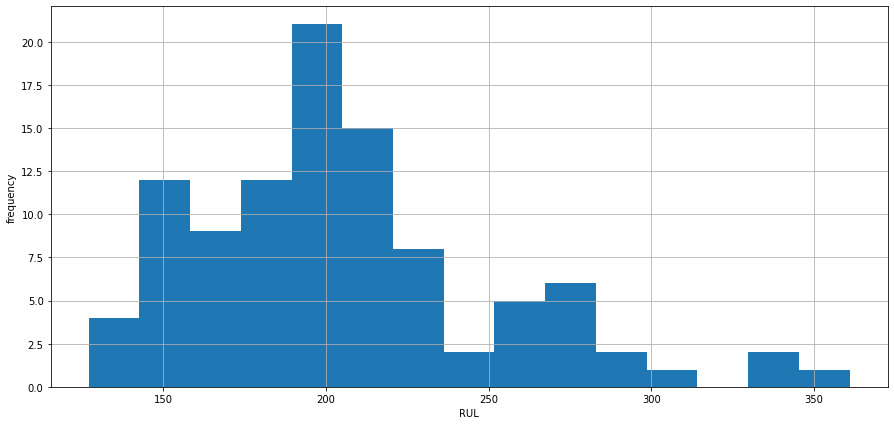

In [ ]:
#To get a better understanding about the large deviation in running cycle, let's visualize via the distribution of max RULs of each engine.  
df_max_rul = df[['unit_number', 'RUL']].groupby('unit_number').max().reset_index() 
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

**Observations:**
*   The graph confirms our previous observation - most engines break down around 200 cycles
*   The graph is skewed to the right, which means that few engines could go over 300 cycles. This explained why the standard deviation is large. 

unit_number and time_in_cycles do not hold further useful information. We will drop them from the data later.

#### **4.4.2. Settings distribution**

The engines have 3 operational settings that have a substantial effect on engine performance. They are 'setting_1', 'setting_2', and 'TRA'. We can expect all 100 engines were having the same operational settings, although the data description does not explicitly stated that. Let's start by looking at their descriptive statistics. 

In [ ]:
#Check the descriptive statistics of 3 operational settings
df[['setting_1', 'setting_2', 'TRA']].describe()

setting_1     setting_2      TRA
count  20631.000000  20631.000000  20631.0
mean      -0.000009      0.000002    100.0
std        0.002187      0.000293      0.0
min       -0.008700     -0.000600    100.0
25%       -0.001500     -0.000200    100.0
50%        0.000000      0.000000    100.0
75%        0.001500      0.000300    100.0
max        0.008700      0.000600    100.0

**Observations:**
*   There are very small fluctuatitons in setting 1 and 2, while setting 3 (TRA) is constant.
*   We can infer from this that these 100 engines were ran in the same operational settings. We can drop these 3 variables for now. They could be used when we explore other datasets. 

In [ ]:
# We can drop these 3 variables now.
df.drop(columns=['setting_1', 'setting_2', 'TRA'],inplace=True)

#### **4.4.3. Sensors distribution**

There are 21 sensors. They are 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', and 'W32'. 

Let's start by looking at their descriptive statistics. 

In [ ]:
#Check the descriptive statistics of 21 sensors - transpose for better view
df[['T2','T24','T30','T50','P2','P15','P30','Nf',
    'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB',
    'htBleed','Nf_dmd','PCNfR_dmd','W31','W32']].describe().transpose()

count         mean           std  ...        50%        75%        max
T2         20631.0   518.670000  6.537152e-11  ...   518.6700   518.6700   518.6700
T24        20631.0   642.680934  5.000533e-01  ...   642.6400   643.0000   644.5300
T30        20631.0  1590.523119  6.131150e+00  ...  1590.1000  1594.3800  1616.9100
T50        20631.0  1408.933782  9.000605e+00  ...  1408.0400  1414.5550  1441.4900
P2         20631.0    14.620000  3.394700e-12  ...    14.6200    14.6200    14.6200
P15        20631.0    21.609803  1.388985e-03  ...    21.6100    21.6100    21.6100
P30        20631.0   553.367711  8.850923e-01  ...   553.4400   554.0100   556.0600
Nf         20631.0  2388.096652  7.098548e-02  ...  2388.0900  2388.1400  2388.5600
Nc         20631.0  9065.242941  2.208288e+01  ...  9060.6600  9069.4200  9244.5900
epr        20631.0     1.300000  4.660829e-13  ...     1.3000     1.3000     1.3000
Ps30       20631.0    47.541168  2.670874e-01  ...    47.5100    47.7000    48.5300
phi        20631.0   521.413470  7.375534e-01  ...   521.4800   521.9500   523.3800
NRf        20631.0  2388.096152  7.191892e-02  ...  2388.0900  2388.1400  2388.5600
NRc        20631.0  8143.752722  1.907618e+01  ...  8140.5400  8148.3100  8293.7200
BPR        20631.0     8.442146  3.750504e-02  ...     8.4389     8.4656     8.5848
farB       20631.0     0.030000  1.556432e-14  ...     0.0300     0.0300     0.0300
htBleed    20631.0   393.210654  1.548763e+00  ...   393.0000   394.0000   400.0000
Nf_dmd     20631.0  2388.000000  0.000000e+00  ...  2388.0000  2388.0000  2388.0000
PCNfR_dmd  20631.0   100.000000  0.000000e+00  ...   100.0000   100.0000   100.0000
W31        20631.0    38.816271  1.807464e-01  ...    38.8300    38.9500    39.4300
W32        20631.0    23.289705  1.082509e-01  ...    23.2979    23.3668    23.6184

[21 rows x 8 columns]

**Observations:**
*   'T2', 'epr', 'Nf_dmd', 'PCNfR_dmd' do not fluctuate. They do not hold any useful information so we will drop them from the data. 
*   'P2', 'P15', and 'farB' fluctuations are very minimal. They are not likely to hold any useful information so we will drop them from the data. 
*   'Nc' and 'NRc' have the highest fluctuation ranges. 

In [ ]:
#Drop 07 variables as they do not hold any useful information. 
df.drop(columns=['Nf_dmd','PCNfR_dmd','T2','epr','P2', 'P15','farB'],inplace=True)

#### **4.4.5. Correlation**

Next, let's generate the correlation heatmap and see how each sensor variable correlates to our target variable (RUL), and also if there are any multicollinearity between them.

Text(0.5, 1.0, 'Correlation heatmap')

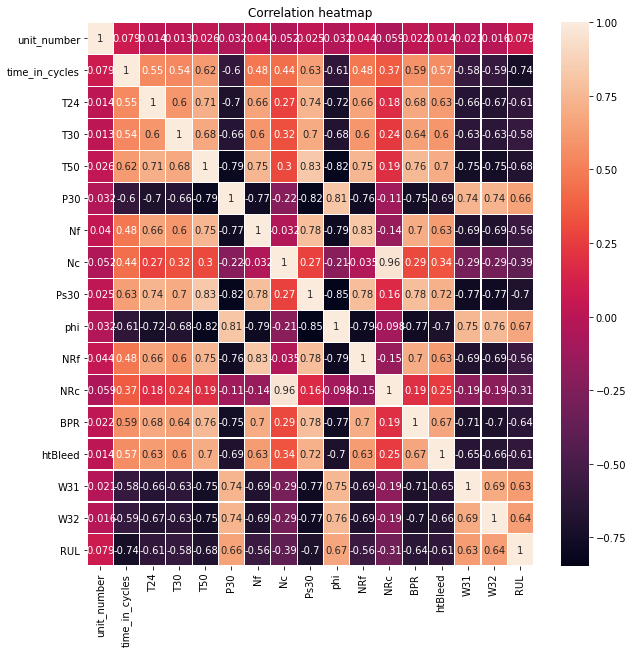

In [ ]:
##generate correlation matric
corr = df.corr()
#generate correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=0.1)
plt.title('Correlation heatmap')

**Observations:**
*   Most sensor variables have high correlation with RUL (>0.5, <-0.5), except for Nc (-0.39) and NRc (-0.31)
*  There are multicollinearity, which could possibly cause problems when fitting the model. We could not treat this now as we don't have the domain knowledge. 
*   Inferring from the heatmap, there are **03 groups of sensors** that behave similarly to each other. Let's group them together for better investigation. 

> **1.   negative_high**: this includes 08 sensors that have negative high correlations (<-0.56) with RUL. They are 'T24', 'T30', 'T50', 'Ps30', 'BPR', 'htBleed', 'Nf', and 'NRf'. 

> When looking closely at multicollinearity, we can see that, in this group,  unlike other 06 sensors which have positive low correlations with 'Nc' and 'NRc', 'Nf' and 'NRf' have negative low to these 2 sensors. Therefore, let's make 2 sub-groups for further investigations: negative_high_2 contains these two and negative_high_1 contains the other six. 

> **2.   negative_low**: this includes 02 sensors that have negative low correlations (>-0.39) with RUL. They are 'Nc', and 'NRc'. 

> **3.   positive_high**: this includes 04 sensors that have positive high correlations (>0.63) with RUL. They are 'P30', 'phi', 'W31', and 'W32'. 

In [ ]:
#we can group the sensors into 3 groups that behave similarly: negative_high (2 sub-groups), negative_low, and positive_high
negative_low = ['Nc', 'NRc']
positive_high = ['P30', 'phi', 'W31', 'W32']
negative_high_1 = ['T24', 'T30', 'T50', 'Ps30','BPR', 'htBleed']
negative_high_2 = ['Nf', 'NRf']
negative_high = negative_high_1 + negative_high_2

##### **4.4.5.1. negative_low correlations with RUL (Nc and NRc)**

Let's dive deeper into the correlation between sensors and RUL by plotting sensor trends when RUL comes to 0 for all 100 engines. To do this, we will define a function **plot_sensor_trend**. 

As plotting trends of 100 engines will potential lead to lack of focus, we will create another function **plot_sensor_trend_n** that limit sensor trends when RUL comes to 0 for ***n*** random engines. 

In [ ]:
#dive deeper into the correlation between sensors and RUL by plotting sensor changes when RUL comes to 0 for all 100 engines
def plot_sensor_trend(sensor):
  plt.figure(figsize=(13,5))
  for i in df['unit_number'].unique():
    plt.plot('RUL', sensor, data=df[df['unit_number']==i])
  plt.xlim(250,0)
  plt.xlabel('RUL')
  plt.ylabel(sensor)
  plt.show()

def plot_sensor_trend_n(sensor, n):
  plt.figure(figsize=(13,5))
  k = random.sample(range(1,100),n)
  for i in k:
    plt.plot('RUL', sensor, data=df[df['unit_number']==i])
  plt.xlim(250,0)
  plt.xlabel('RUL')
  plt.ylabel(sensor)
  plt.show()

Let's start visualize the trend of Nc and NRc, whose correlation with RUL is low negative

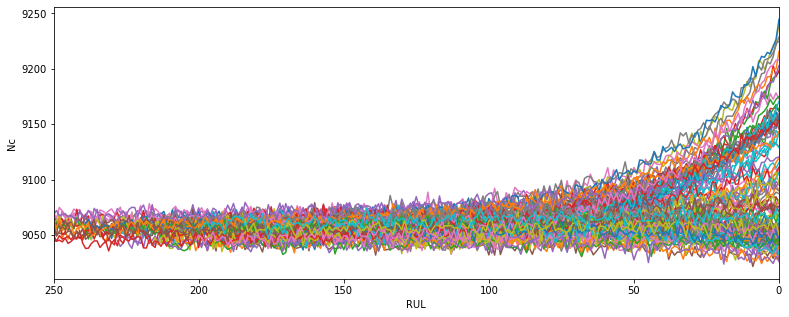

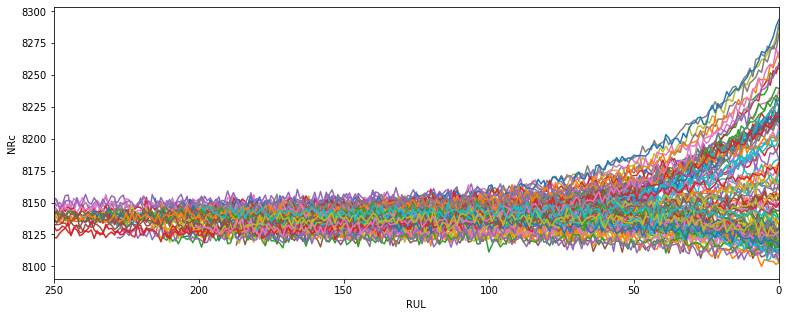

In [ ]:
#start with Nc and NRc, whose correlation with RUL is low negative
for i in negative_low:
  plot_sensor_trend(i)

**Observation:** for 'Nc' and 'NRc', the sensors receive stable signals overtime, but then fluctuate greatly when there are around 50 cycles to failure. 

Let's limit the number of engines 10 to see if there is any differences. 


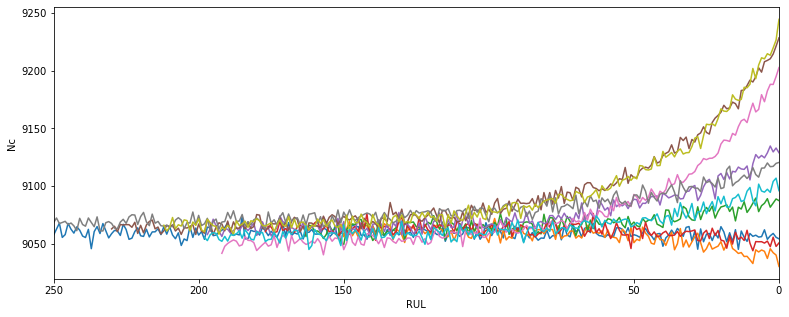

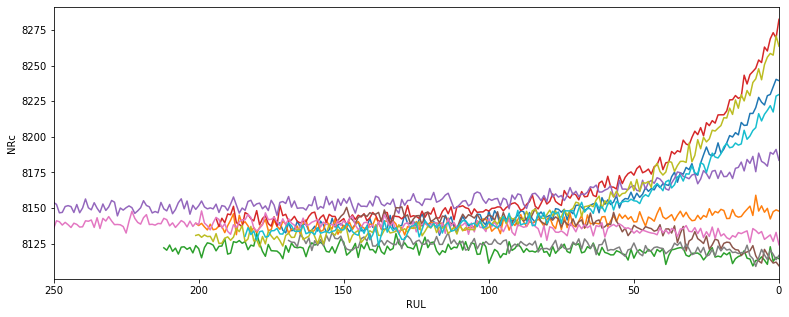

In [ ]:
#limit the sensor plot to 10 engine (10% of the sample) to see if there is any difference
for i in negative_low:
  plot_sensor_trend_n(i,n=10)

**Observation:** the overall trend of these 2 is upward fluctuation. The fluctation range between continuous cycles is small. For some engines, this fluctuation trend is quite minimal.

##### **4.4.5.2. positive_high correlations with RUL (P30, phi, W31, and W32)**

Next, let's move to visualize the trends of 04 sensors with positive high correlations with RUL.

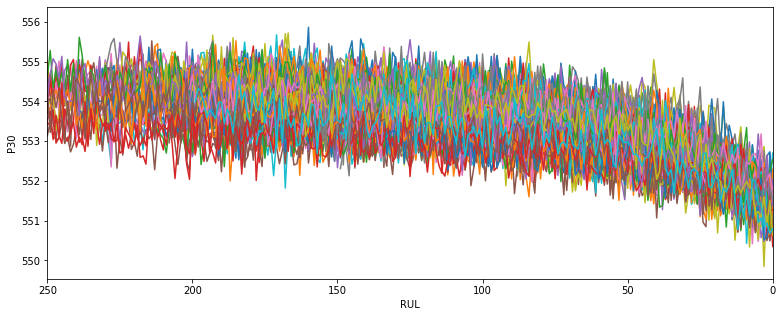

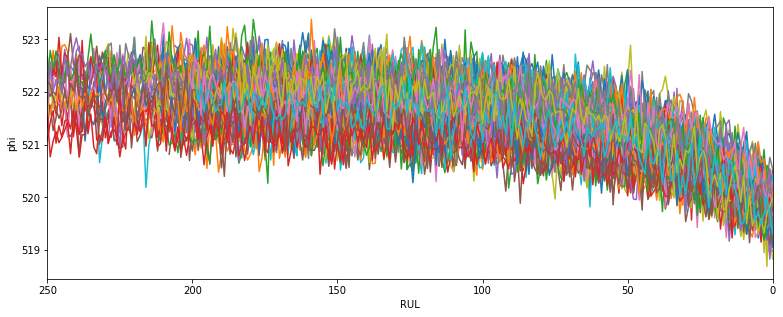

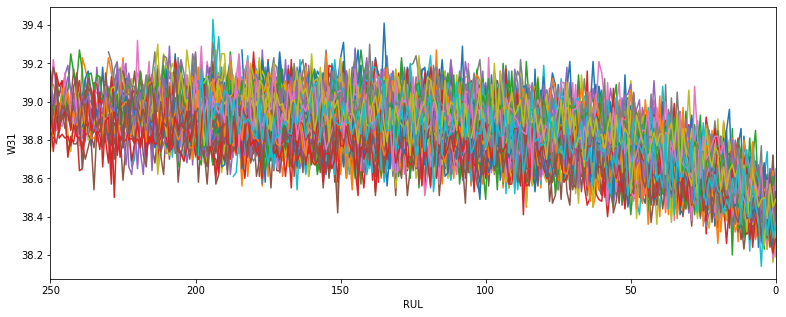

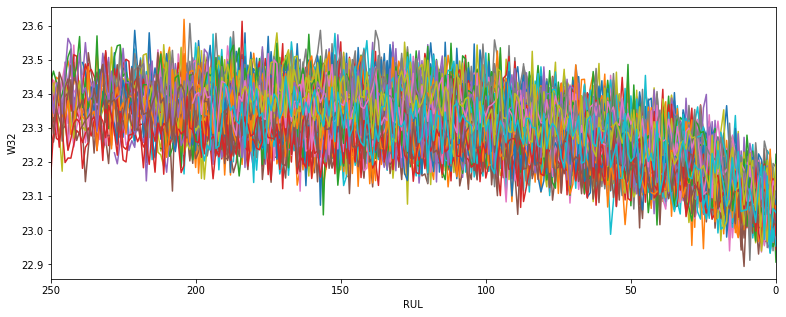

In [ ]:
#these 4 sensors show positve correlation with RUL
positive_high = ['P30', 'phi', 'W31', 'W32']
for i in positive_high:
  plot_sensor_trend(i)

**Observation:** the overall trend of these 04 sensors is downward fluctuation when there is about 50 cycles to failure. 

Again, let's limit to 10 engine to get to know more. 

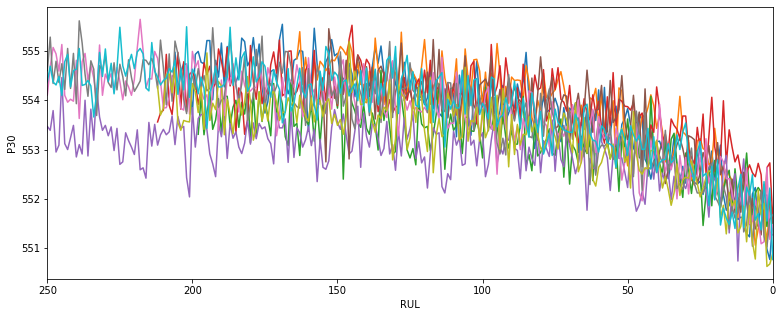

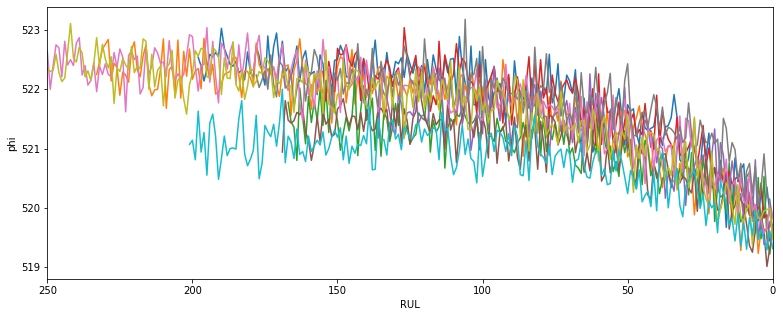

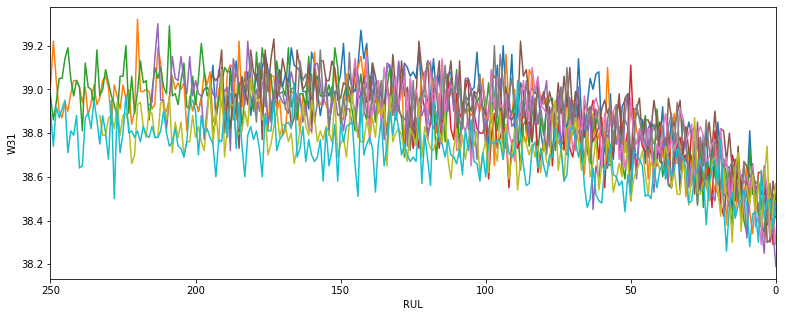

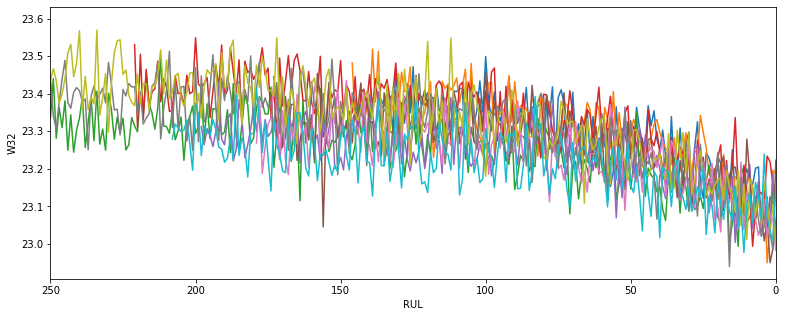

In [ ]:
#Let's limit to 10% of the engine to get to know more:
for i in positive_high:
  plot_sensor_trend_n(i,n=10)

**Observation:** The same with previous observation - the overall trend is downward fluctuation, it is clearer when there are around 50 cycles to failure. Noted that the fluctation range between continuous cycles is very high. 

##### **4.4.5.3. negative_high correlations with RUL (T24, T30, T50, Nf, Ps30, NRf, BPR, and htBleed)**

Next, let's move to visualize the trends of 08 sensors with negative high correlations with RUL.

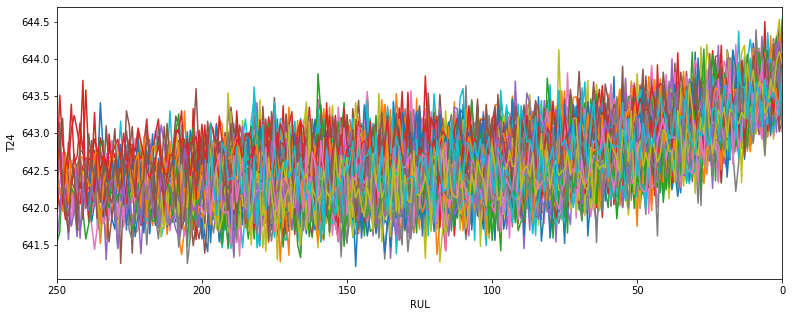

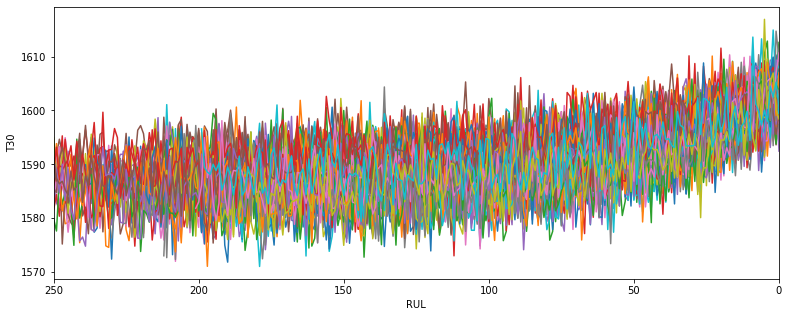

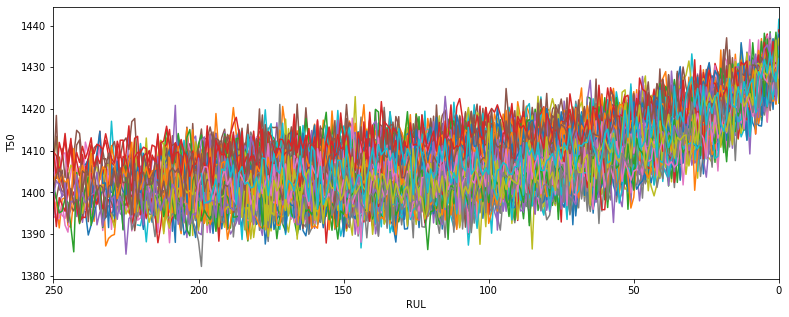

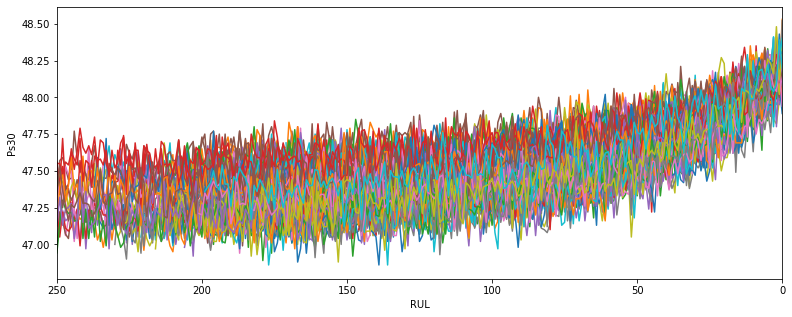

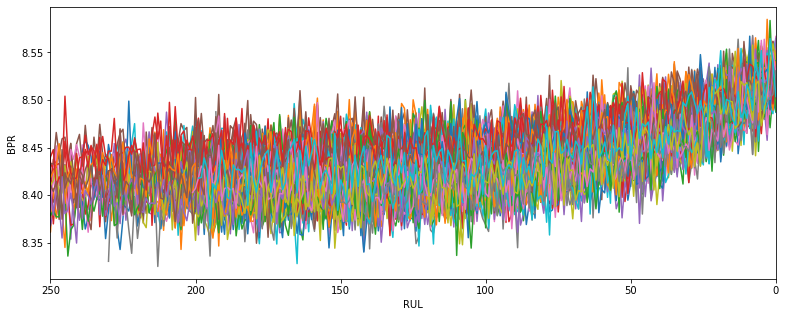

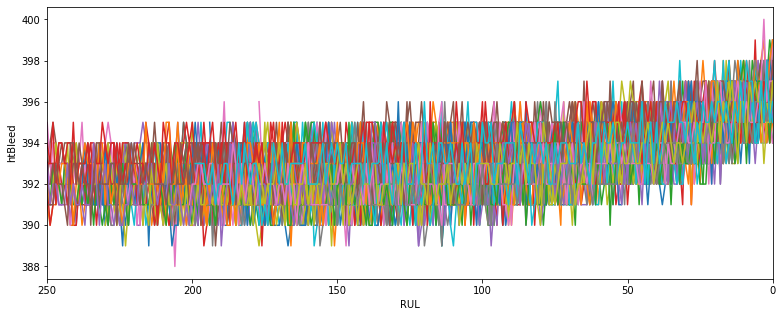

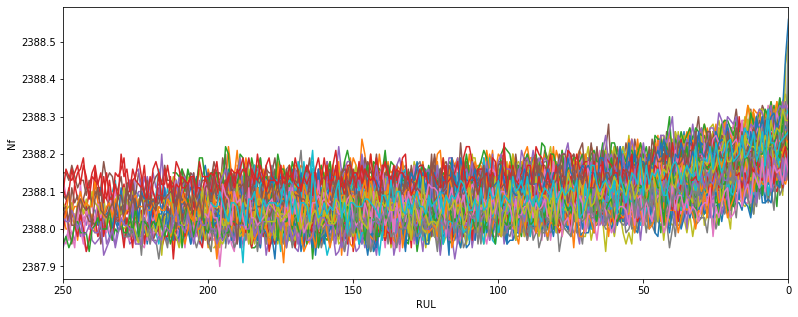

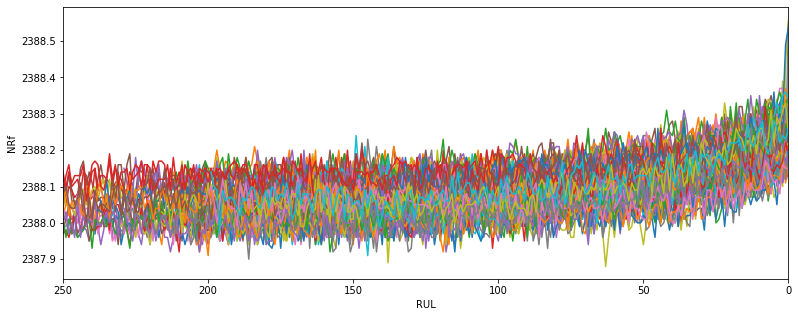

In [ ]:
#these 08 sensors show high negative correlations with RUL
for i in negative_high:
  plot_sensor_trend(i)

**Observation:** 
*   Overall trend is upward fluctuation towards failure, but the range of fluctuation between continous cycles depends on each sensor (some high, some low).
*   Noted that fluctuation range of 'htBleed' is very neat. This need further investigation. 

Let's limit to 10 engines. But this time let's seperate the 2 sub-groups (negative_high_1 and negative_high_2), and also investigate the shape of htBleed. 

Let's start with negative_high_1.

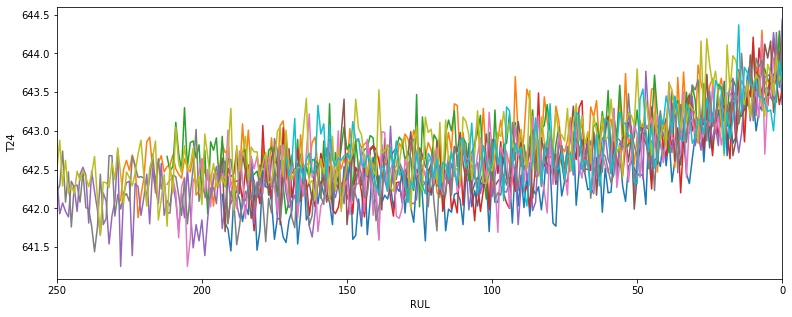

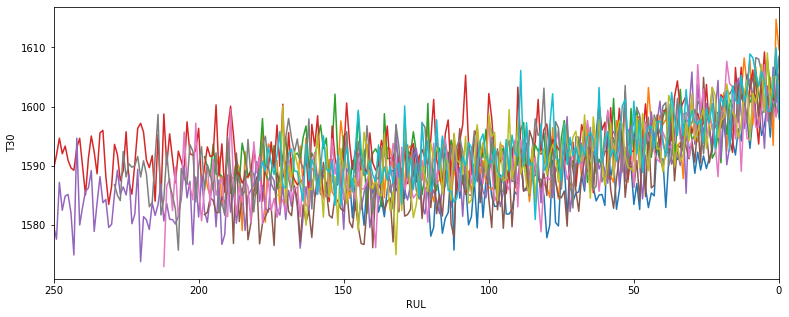

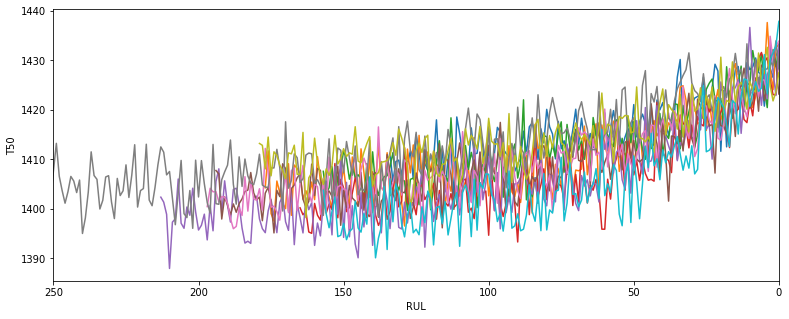

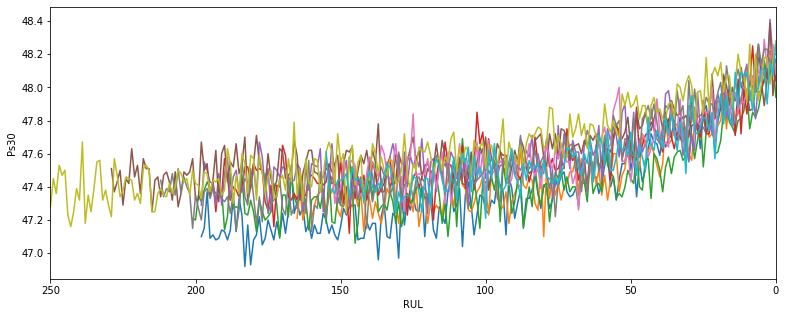

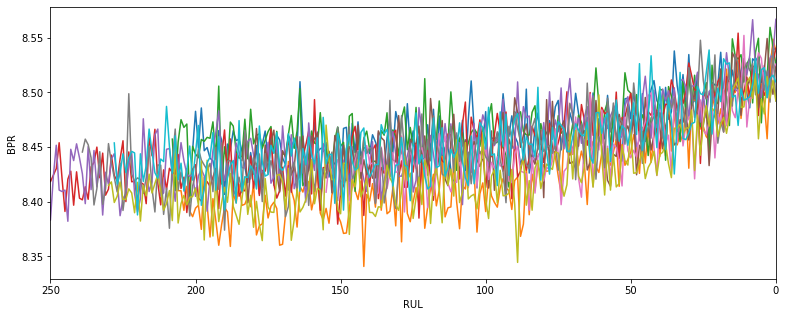

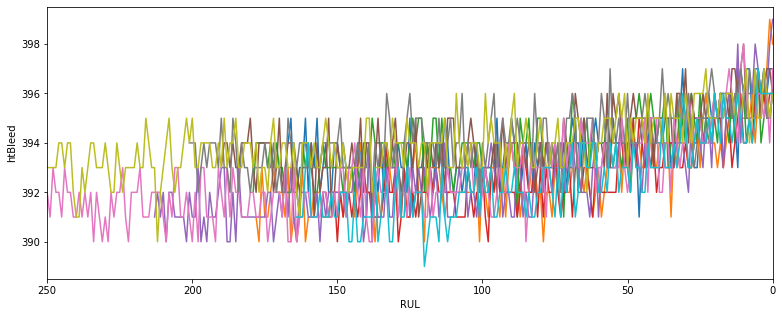

In [ ]:
#Let limit to 10 engines for negative_high_1:
for i in negative_high_1:
  plot_sensor_trend_n(i, 10)

**Observation:** 
*   The upward fluctuation trend shows clearer when there are around 50 cycles to failure.
*   For htBleed, the neat of this sensor comes from its discrete values, it is worth noted that it sensor remain unchanged in some continuous cycles.
*   There are many sharp peaks when looking at these graphs, which indicates that the fluctuation ranges between continuos cycles are very high. 

Let's continue with negative_high_2.

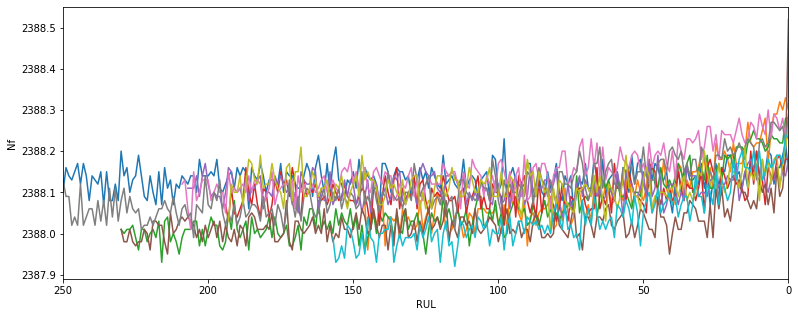

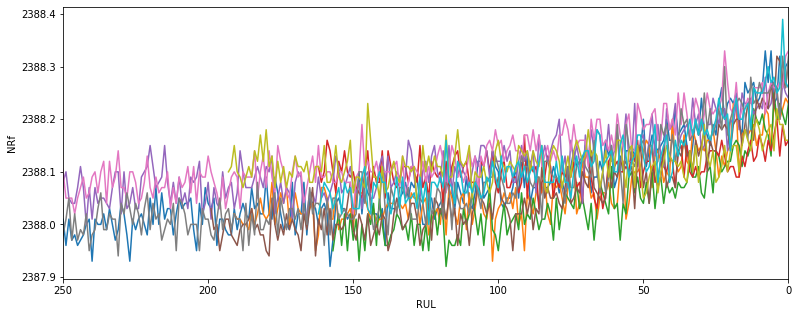

In [ ]:
#Let limit to 10 engines for negative_high_2:
for i in negative_high_2:
  plot_sensor_trend_n(i, 10)

**Observation:** 
*   The same with previous observation. Overall trend is upward fluctuation towards failure.
*   There are also many sharp peaks when looking at these graphs, which indicates that the fluctuation ranges between continuos cycles are very high. 

We have finished the Exploratory Data Analysis. Now let's move to Data Preparation


##**V. DATA PREPARATION**##

###**5.1. Prepare training data**##

First, we need to check on the data. Let's see the columns left in train set. 

In [ ]:
#create a copy of the data
train = pd.DataFrame.copy(df)
#before getting on the modelling, we will have to drop unit_number and 'time_in_cycles'
train.drop(columns=['unit_number', 'time_in_cycles'],inplace=True) 
print('columns of train:', train.columns)

columns of train: Index(['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'htBleed', 'W31', 'W32', 'RUL'],
      dtype='object')


For the train set, we need to seperate the independent variables (14 sensors left) and target variable (RUL). We will store all sensor variables in X_org, and RUL in y_org. 

In [ ]:
X_org = train.drop(columns = ['RUL'])
y_org = train['RUL']

###**5.2. Divide train set to 06 folds - train set and validation set**##

The train set will be divided into 06 folds, with 01 fold used only for independent testing (validation set), and 05 folds to test different models. 

After splitting, we need to check the distribution of splitted folds to ensure there is no distribution deviation.

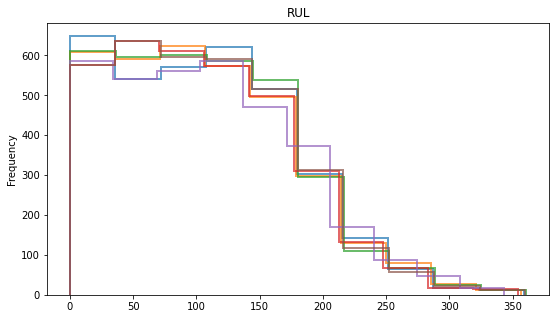

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
kf = KFold(n_splits=6, shuffle= True, random_state=12) #create 6 folds, shuffle the data before splitting
#visualize the distribution of RUL in each fold by histogram
fig, ax = plt.subplots(figsize=(9,5))
for train_index, test_index in kf.split(X_org):
    X, X_val = X_org.iloc[list(train_index)], X_org.iloc[list(test_index)] 
    y, y_val = y_org.iloc[list(train_index)], y_org.iloc[list(test_index)]
    ax.hist(y_val, bins=10, histtype='step', linewidth=2,alpha=0.7, label=['RUL'])
plt.ylabel('Frequency')
plt.title('RUL')
plt.show()

Checking the distribution after splitting to 6 folds, we observe that the split is good, there is no deviation in distribution of RUL. All folds have RUL ranges from 0 to above 350, and its frequency starts to decrease after 150 cycles. The distribution is skewed to the right, with matched with our previous observation (IV. Data Understanding) - not many engine could go over 300 cycles.

##**VI. MODELLING AND EVALUATION - REGRESSION APPROACH**##

###**6.1. Evaluation measurements**##

To evaluate the model, I choose to use **R2**, **Root Mean Squared Error (RMSE)** and the **Score** formula given by the original competiton. **RMSE is the most important metric to be used in evaluating final model**, however, other metrics are also used for consideration and reference.  
*   **R2** (coefficient of determination) will help to indicate what proportion of our dependent variable (RUL) can be explained by the independent varibles (sensors) we use. 
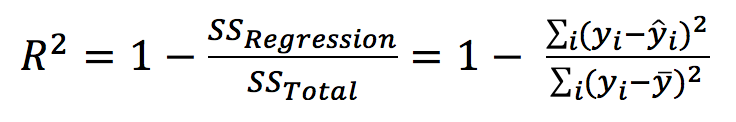

*   **RMSE** is the square root of the mean of the square of all of the error. It will indicate how many cycles the prediction are off on average. 

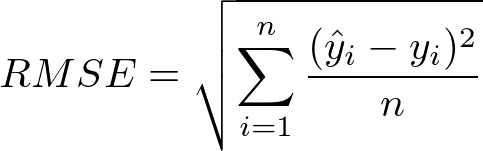

*   **Score** function (given by the original competition) is based on the real-world preference for equipment prognostics, that is a late prediction of failure will be penalized heavier than early prediction. The formulate to calculate the score is as follow, with UUTs (unit under test). The relation between score and error is therefore asymmetric. 
*   Follow the logic of calculating Score, it will also helpful if we know the exact the number of cases of **under-prediction (predicted RUL > true RUL)**, **over-prediction (predicted RUL < true RUL)**, and **correct prediction (predicted RUL = true RUL)**.


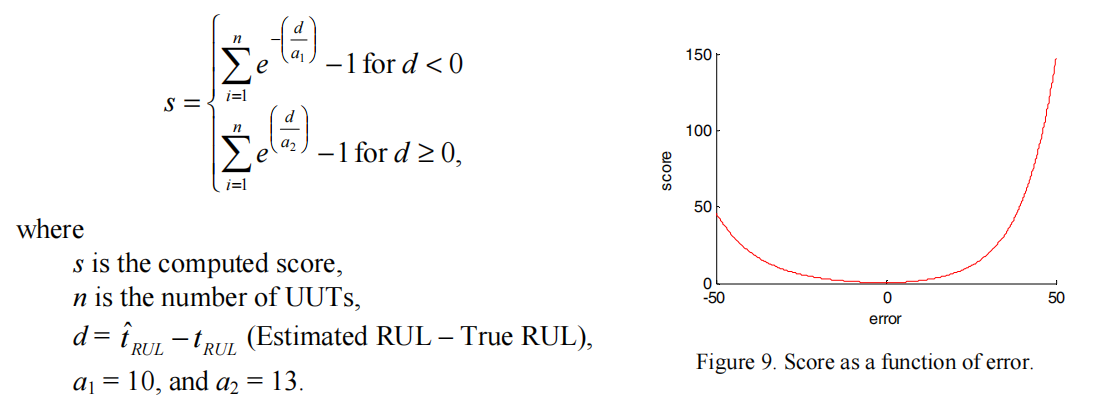


We need to write a function *evaluate_model*, which will return R2, RMSE, Score, under-prediction, over-prediction, and correct-prediction

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
def calculate_score(y, y_hat): #write a function to calculate Score, under-prediction, over-prediction, correct-prediction
    score = -1  #the score
    under = 0 
    over = 0 
    correct = 0 
    for i, j in zip(y_hat, y):
      d = i - j
      if d == 0:
        correct = correct + 1
        score = score + math.exp(d/13) 
      elif d > 0:
        under = under + 1
        score = score + math.exp(d/13) 
      else:
        over = over + 1
        score = score + math.exp(-d/10)
    return score, under, over, correct

def evaluate_model(model, X, y): #write a function to score R2, RMSE, and Score
    y_hat = model.predict(X)
    r2 = r2_score(y, y_hat)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    score, under, over, correct = calculate_score(y, y_hat)
    return r2, rmse, score, under, over, correct

#create a list to store different model performance scores for future use
lr_score_list = [] 

###**6.2. Base model - Linear regression with k-fold cross validation**##

We will split the train set to 5 subsets for k-fold. We will create 05 Linear Regression models by iteratively using 04 subsets for training and 01 subset for testing. Then we will test all 05 models using the validation set.

The average test R2, RMSE and Score of these 05 models on the validation will be our base result.

First we need a function to create and fit linear regression model. Then we will do the splitting and check the distribution of splitted folds to ensure there is no distribution deviation.

In [ ]:
from sklearn import linear_model
def fit_lr(X_train, y_train, X_test, y_test): #write a function to create and fit linear regression model
    #create and fit model
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    return model

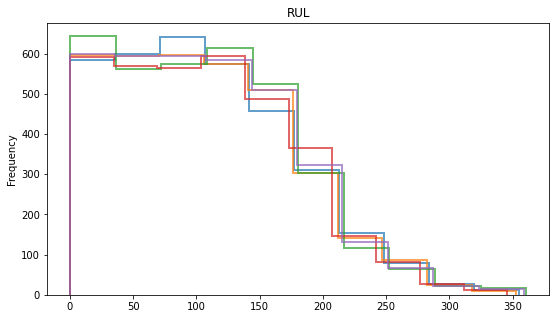

In [ ]:
kf = KFold(n_splits=5, shuffle= True, random_state= 2) #create 5 folds, shuffle the data before splitting
fig, ax = plt.subplots(figsize=(9,5))
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)] 
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)] 
    ax.hist(y_test, bins=10, histtype='step', linewidth=2,alpha=0.7, label=['RUL'])
plt.ylabel('Frequency')
plt.title('RUL')
plt.show()

The split is okay. Now we will fit linear regression models and print out the results.

In [ ]:
score_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    #create and fit model
    model = fit_lr(X_train, y_train, X_test, y_test)
    #score model for k-fold train set
    r2, rmse, score, under, over, correct = evaluate_model(model, X_train, y_train)
    score_list.append(['k-fold train', r2, rmse, score, under, over, correct])
    #score model for k-fold test set
    r2_1, rmse1, score1, under1, over1, correct1 = evaluate_model(model, X_test, y_test)
    score_list.append(['k-fold test', r2_1, rmse1, score1, under1, over1, correct1])
    #score model for the validation set
    r2_2, rmse2, score2, under2, over2, correct2 = evaluate_model(model, X_val, y_val)
    score_list.append(['validation', r2_2, rmse2, score2, under2, over2, correct2])
    
#combine all lists into a dataframe for score
kf_score = pd.DataFrame(score_list, columns = ['type','r2_score', 'rmse', 
                                               'Score','under-prediction', 'over-prediction', 'correct-prediction'])
kf_score.groupby('type').mean()

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.578239  44.826914  ...           1485.2                 0.0
k-fold train  0.579031  44.788405  ...           5955.0                 0.0
validation    0.581462  44.066572  ...           1437.6                 0.0

[3 rows x 6 columns]

In [ ]:
#filter 05 results of k-fold test for closer examination
condition = kf_score['type'] == 'k-fold test'
kf_score[condition]

type  r2_score  ...  over-prediction  correct-prediction
1   k-fold test  0.567817  ...             1457                   0
4   k-fold test  0.584901  ...             1460                   0
7   k-fold test  0.590135  ...             1511                   0
10  k-fold test  0.574413  ...             1502                   0
13  k-fold test  0.573930  ...             1496                   0

[5 rows x 7 columns]

After fitting 05 models and evaluate, we have the above result. 
*   **R2 is equally the same for k-folds (~0.57). It is slightly better in the validation set, R2 value is ~0.58.**
*   **RMSE is equally the same for k-folds (~44.8). RMSE is slightly better on the validation set (44.06)**
*   **Score is much better in k-folds test (~2.3e+09) than validation set (6.5e+09) and k-folds train set (9.4e+09)**. The main factors that lead to this might be because the size of validation set and k-folds test are much smaller than k-fold train (1/5), which leads to the smaller sum of penalty; and also the big difference in the performance of 05 k-folds test.
*   **The models make no correct prediction, and have the tendency to make under-prediction.** While in k-folds, under-prediction take about 56% of the result, in validation set, it comes to 58%. 

We will save the base linear regression model to final_score for future use. 

In the next section, we will try to craete better models (with **validation R2 > 0.58, RMSE < 44, and Score < 6.5e+09)**. We will need to re-consider the linearly declining RUL assumption, and try to reduce under predictions.




In [ ]:
lr_score_list.append(['Base Linear Regression']+kf_score.groupby('type').mean().iloc[2].tolist()) #save the base performance to final score list for future use
final_score = pd.DataFrame(lr_score_list, columns = ['regressor','r2_score', 'rmse', 
                                'Score','under-prediction', 'over-prediction', 'correct-prediction'])
final_score = final_score.set_index('regressor')

###**6.3. Feature-engineering (Re-define RUL) & Re-run K-fold**

####**6.3.1 Feature-engineering (Re-define RUL)**

We previously assume RUL as a linear declining function. Let's illustrate this assumption by plotting RUL, time_in_cycles with 3 preresentative sensor trends from 3 correlation groups: negative_low, positive_high, and negative_high..

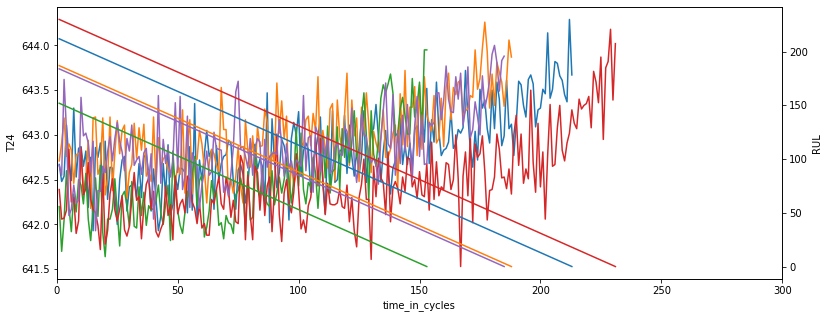

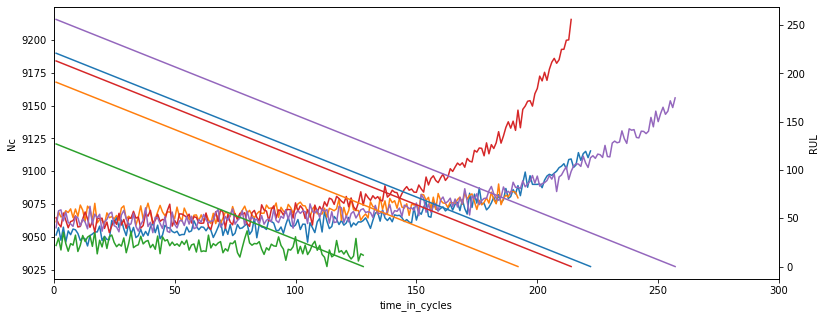

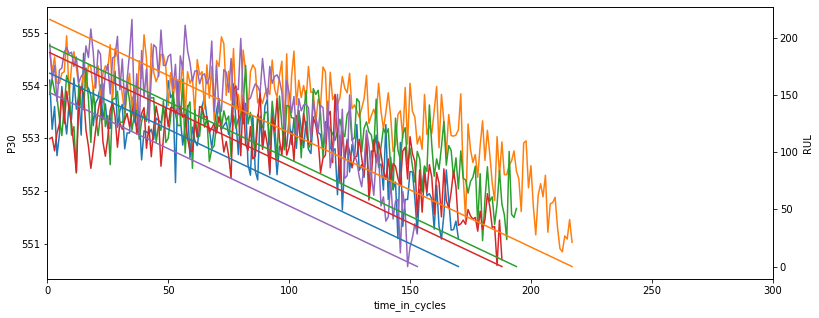

In [ ]:
selected_sensors = [negative_high[0], negative_low[0], positive_high[0]] 
for s in selected_sensors:
  k = random.sample(range(1,100),5)
  fig, ax1 = plt.subplots(1,1, figsize=(13,5))
  ax2 = ax1.twinx()
  for i in k:
    ax1.plot('time_in_cycles', s, data=df[df['unit_number']==i])
    ax2.plot('time_in_cycles', 'RUL', data=df[df['unit_number']==i])
  ax1.set_ylabel(s)
  ax1.set_xlabel('time_in_cycles')
  ax2.set_ylabel('RUL')
  plt.xlim(0,300)
  plt.show()

We can observe that the linear declining RUL assumption is not adequate. All 3 representative sensors are quite **stable at the beginning**, and **their sensor trend lines start to *bend* at a certain point.** This is due to the engines **only develop faults at some point during the series.**

Thus, when the sensor trend line has its first bend, that is when we could reasonably tell the engine is degrading, and the linear declining RUL is adequate. Before that first bend, we could not reasonably say anything about the RUL as we don't know about the initial wear and tear. **Therefore, the more adequate trend of RUL would be stable at a constant (maximum) and then linear declining after some points.**

Although previous findings show that all sensors fluctuate greatly when RUL < 50, it is hard to determine which should be the suitable constant for RUL to start with. Therefore, I will prune the data with several different upper values (100, 125, 150, and 175) for RUL, then re-run the base model and choose the max value that leads to best model performance. The reasons to choose these 4 values is because they are around Q1 to Q3 of RUL distribution.  

Next I will define a function to save time prune the data and get the pruned data sets corresponding with the 04 different upper values for RUL.

In [ ]:
def data_prune_RUL(i): #define a function to save time prune the data, i is the max value of RUL.
  train = pd.DataFrame.copy(df[df['RUL']<=i]) #copy the data, take only rows where RUL >= i
  train.drop(columns=['unit_number', 'time_in_cycles'],inplace=True) #drop unnecessary columns
  X = train.drop(columns = ['RUL'])
  y = train['RUL']
  return X, y

In [ ]:
X_100, y_100 = data_prune_RUL(100)
X_125, y_125 = data_prune_RUL(125)
X_150, y_150 = data_prune_RUL(150)
X_175, y_175 = data_prune_RUL(175)

Now we have got the pruned data as required, let's re-run the base model.

####**6.3.2 Choose new max RUL values**

We will write *quick_check_split* function and *quick_fit_evaluate_lr* function to save time in re-run k-fold with 04 new max RUL values.

In [ ]:
#visualize the distribution of RUL in each fold by histogram
def quick_check_split(X,y):
  kf = KFold(n_splits=6, shuffle= True, random_state= 42)
  fig, ax = plt.subplots(figsize=(9,5))
  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)] 
      y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)] 
      ax.hist(y_test, bins=10, histtype='step', linewidth=2,alpha=0.7, label=['RUL'])
  plt.ylabel('Frequency')
  plt.title('RUL')
  plt.show()

#make a function to fit and evaluate to save time
def quick_fit_evaluate_lr(X_org, y_org):
  kf = KFold(n_splits=6, shuffle= True, random_state= 42)
  for train_index, test_index in kf.split(X_org):
      X, X_val = X_org.iloc[list(train_index)], X_org.iloc[list(test_index)]
      y, y_val = y_org.iloc[list(train_index)], y_org.iloc[list(test_index)]
  score_list = []
  #split and fit models on 05 folds
  kf = KFold(n_splits=5, shuffle= True, random_state= 2)
  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
      y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
      #create and fit model
      model = fit_lr(X_train, y_train, X_test, y_test)
      #score model for k-fold train set
      r2, rmse, score, under, over, correct = evaluate_model(model, X_train, y_train)
      score_list.append(['k-fold train', r2, rmse, score, under, over, correct])
      #score model for k-fold test set
      r2_1, rmse1, score1, under1, over1, correct1 = evaluate_model(model, X_test, y_test)
      score_list.append(['k-fold test', r2_1, rmse1, score1, under1, over1, correct1])
      #score model for the validation set
      r2_2, rmse2, score2, under2, over2, correct2 = evaluate_model(model, X_val, y_val)
      score_list.append(['validation', r2_2, rmse2, score2, under2, over2, correct2])
  #combine all lists into a dataframe for score
  kf_score = pd.DataFrame(score_list, columns = ['type','r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])
  return kf_score.groupby('type').mean()

Start by make split into 06 folds (1 fold as validation) and check distribution.

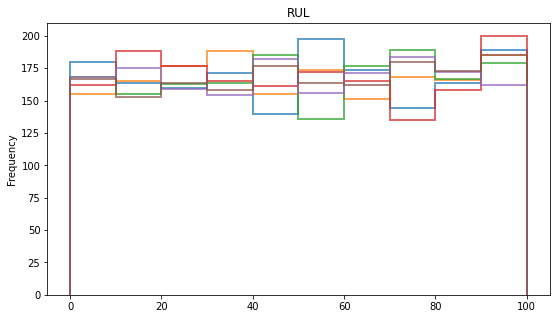

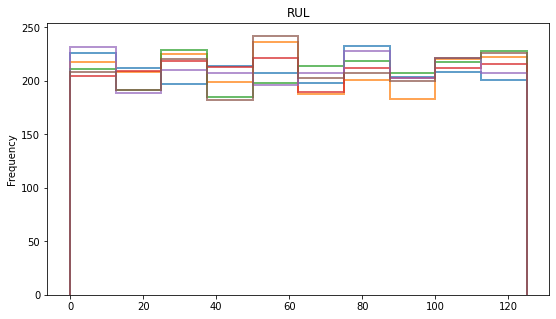

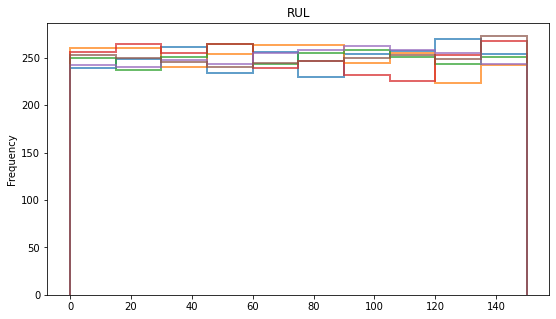

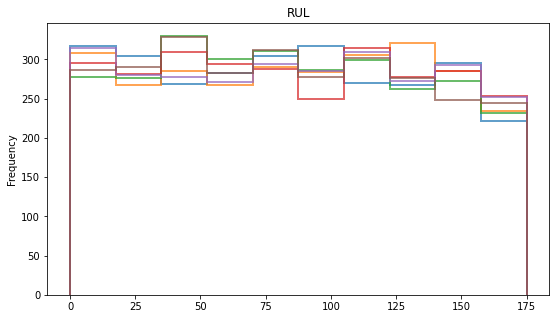

In [ ]:
kf = KFold(n_splits=6, shuffle= True, random_state= 42) #create 6 folds, shuffle the data before splitting
quick_check_split(X_100, y_100)
quick_check_split(X_125, y_125)
quick_check_split(X_150, y_150)
quick_check_split(X_175, y_175)

The splits seem good. Next we will fit Linear Regression models and evaluate what is most appropriate threshold for RUL based on the average performance. 

In [ ]:
quick_fit_evaluate_lr(X_100, y_100)

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.738420  14.909791  ...            768.2                 0.0
k-fold train  0.739654  14.881403  ...           3074.2                 0.0
validation    0.735012  14.973465  ...            751.2                 0.0

[3 rows x 6 columns]

In [ ]:
quick_fit_evaluate_lr(X_125, y_125)

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.719554  19.258714  ...            960.6                 0.0
k-fold train  0.720465  19.232063  ...           3844.2                 0.0
validation    0.698143  19.968243  ...            940.8                 0.0

[3 rows x 6 columns]

In [ ]:
quick_fit_evaluate_lr(X_150, y_150)

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.693679  23.986265  ...           1141.4                 0.0
k-fold train  0.694631  23.956188  ...           4556.2                 0.0
validation    0.695198  24.189377  ...           1149.2                 0.0

[3 rows x 6 columns]

In [ ]:
quick_fit_evaluate_lr(X_175, y_175)

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.667138  28.793355  ...           1300.0                 0.0
k-fold train  0.668069  28.761092  ...           5192.8                 0.0
validation    0.666185  28.622331  ...           1239.8                 0.0

[3 rows x 6 columns]

After re-run base moldes with pruned data, we can observe that setting new RUL max values results in much better model performance. 
*   **R2** continues to equally the same for k-fold and validation set, but has **greatly improved compared to base model** (~0.57). R2 ranges from **0.66** to **0.73**.
*   The same to R2, **RMSEs of k-fold and validation set have greatly improved (~14 to ~28)**, compared to base model at 44**
*   **Score is much better (~8422 to ~186979, much smaller than base model (6.5e+09)**.
*   There still no correct prediction, **the tendency to make under-prediction is slightly overcomed**. For validation set, under-prediction take up for 54-56%, slightly better than the base model (58%)

Follow these observations, I believe **max RUL value = 100 is more suitable** than other three values as its R2, RMSE, and Score are better. 

Next, we will update the new max value of RUL = 100 in the train set, and re-run k-fold.


####**6.3.3 Update max RUL = 100 and re-run k-fold**

We need to update the value RUL (All RUL > 100 will be now become 100) and re-run k-fold. Before we re-run k-fold, let's check the updated trend of RUL with time_in_cycles and selected sensors.

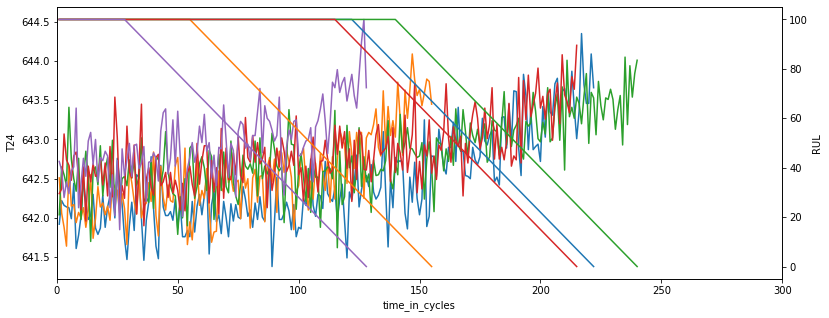

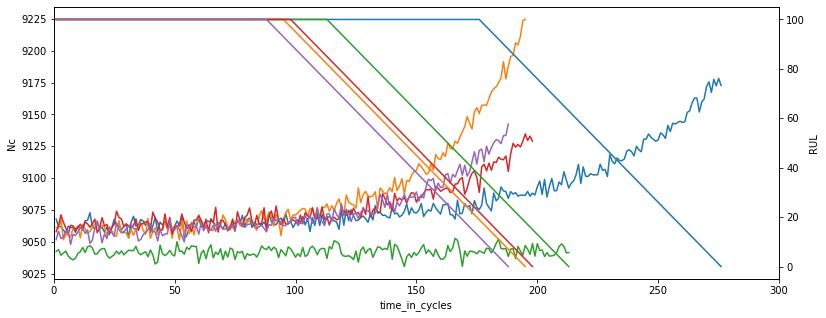

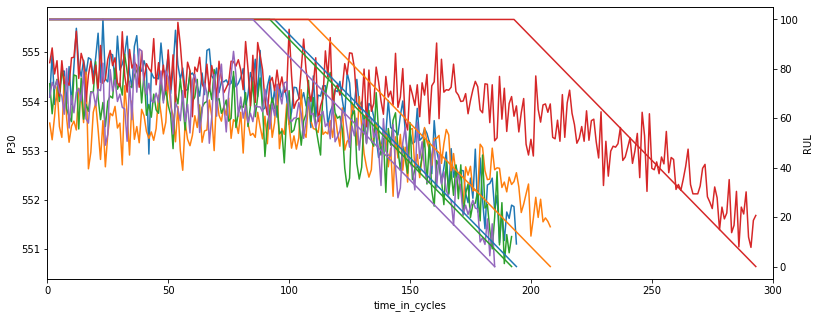

In [ ]:
#update new value of RUL - max RUL = 100
train = pd.DataFrame.copy(df)
new_RUL = pd.DataFrame(train['RUL']).copy()
new_RUL[new_RUL['RUL']>= 100] = 100
train['RUL'] = new_RUL
#select the first sensor in 3 correlation groups
selected_sensors = [negative_high[0], negative_low[0], positive_high[0]] 
for s in selected_sensors:
  k = random.sample(range(1,100),5)
  fig, ax1 = plt.subplots(1,1, figsize=(13,5))
  ax2 = ax1.twinx()
  for i in k:
    ax1.plot('time_in_cycles', s, data=train[train['unit_number']==i])
    ax2.plot('time_in_cycles', 'RUL', data=train[train['unit_number']==i])
  ax1.set_ylabel(s)
  ax1.set_xlabel('time_in_cycles')
  ax2.set_ylabel('RUL')
  plt.xlim(0,300)
  plt.show()

Setting a max value for RUL is more adequate than linear declining RUL. The above graph for P30 shows great improvement: while the sensor trends are stable in first 50 - 150 cycles, the RUL trend is also stable; and when the sensor trends start to bend, the RUL trend becomes linear declining. 

Next let's continue update the data.

In [ ]:
#before getting on the modelling, we will have to drop unit_number and 'time_in_cycles'
train.drop(columns=['unit_number', 'time_in_cycles'],inplace=True)
#prepare X_org and y_org
X_org = train.drop(columns = ['RUL'])
y_org = train['RUL']

Then we split the data into 06 folds (with 01 fold to be use as validation set and check distribution of the split. 

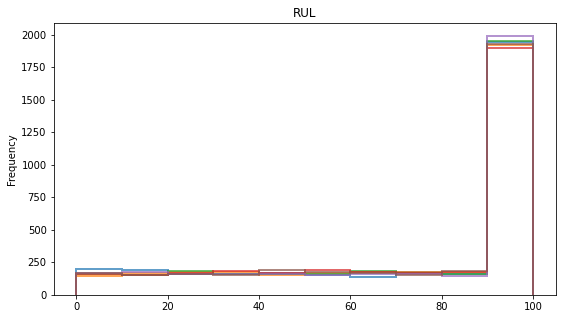

In [ ]:
kf = KFold(n_splits=6, shuffle= True, random_state=12) #create 6 folds, shuffle the data before splitting
#visualize the distribution of RUL in each fold by histogram
fig, ax = plt.subplots(figsize=(9,5))
for train_index, test_index in kf.split(X_org):
    X, X_val = X_org.iloc[list(train_index)], X_org.iloc[list(test_index)] 
    y, y_val = y_org.iloc[list(train_index)], y_org.iloc[list(test_index)]
    ax.hist(y_val, bins=10, histtype='step', linewidth=2,alpha=0.7, label=['RUL'])
plt.ylabel('Frequency')
plt.title('RUL')
plt.show()

As expected, with the max RUL value sets at 100, the distribution of RUL has changed. The split is ok to proceed. 

In [ ]:
quick_fit_evaluate_lr(X_org,y_org)

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.754688  15.943954  ...           1666.8                 0.0
k-fold train  0.755358  15.926115  ...           6672.8                 0.0
validation    0.750929  16.251511  ...           1629.2                 0.0

[3 rows x 6 columns]

As expected, the performance is much better than the base model, but not as good as the pruned data. This is explainable through the big difference in k-fold and validation sizes.  
*   **R2** continues to equally the same for k-fold and validation set (0.75), much compared to the base model (0.58).
*   **RMSE for k-fold and validation set are greatly improved(~15-16)**, compared to the base model at 44.
*   **Score is much better (~17256), much smaller than base model (6.5e+09)**.
*   There still no correct prediction, but **the tendency to make under-prediction in the true test set has been overcomed compared to the base model.** For validation set, under-prediction take up for 52%, much better than the base model (58%)

This shows that we have overcome the issue of linearly declining RUL by updating max RUL = 100, and this brings substantial benefits to the linear regression model. 

We will run linear regression with updated max RUL = 100 and save the results in final_score for future use. 

In the next section, we will test with advanced linear regression (polynomial regression) to see if it could result in better performance.

In [ ]:
lr = linear_model.LinearRegression()
model = lr.fit(X, y)
r2, rmse, score, under, over, correct = evaluate_model(model,X_val, y_val)
final_score.loc['LR (updated max RUL = 100)'] = [r2, rmse, score, under, over, correct]

In [ ]:
final_score

r2_score  ...  correct-prediction
regressor                             ...                    
Base Linear Regression      0.581462  ...                 0.0
LR (updated max RUL = 100)  0.757579  ...                 0.0

[2 rows x 6 columns]

###**6.4. Polynomial Regression**

####**6.4.1. Create 2nd degree Polynomial combinations and run k-fold**

We will increase the number of features by creating their 2nd degree polynomial combinations, and test if this helps improve model performance.

First, creating 2nd degree polynomial combinations means that [a, b] becomes [1, a, b, a^2, ab, b^2].

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 2nd degree polynomialFeatures
poly = PolynomialFeatures(2)
X_po = poly.fit_transform(X)
X_val_po = poly.fit_transform(X_val)
X_po_columns = poly.get_feature_names(X.columns) #get the names for polynomial features
print(X.shape)
print(X_po.shape)

(17193, 14)
(17193, 120)


The size of features has been increased from 14 to 120. Now we need to re-run k-fold with these new polynomial combinations. 

In [ ]:
X_po = pd.DataFrame(X_po) #turn X_po to dataframe
#update the quick_fit_evaluate_lr function
def quick_fit_evaluate_lr(X,y,X_val,y_val):
  kf = KFold(n_splits=5, shuffle= True, random_state= 2)
  score_list = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
      y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
      #create and fit model
      model = fit_lr(X_train, y_train, X_test, y_test)
      #score model for k-fold train set
      r2, rmse, score, under, over, correct = evaluate_model(model, X_train, y_train)
      score_list.append(['k-fold train', r2, rmse, score, under, over, correct])
      #score model for k-fold test set
      r2_1, rmse1, score1, under1, over1, correct1 = evaluate_model(model, X_test, y_test)
      score_list.append(['k-fold test', r2_1, rmse1, score1, under1, over1, correct1])
      #score model for the validation set
      r2_2, rmse2, score2, under2, over2, correct2 = evaluate_model(model, X_val, y_val)
      score_list.append(['validation', r2_2, rmse2, score2, under2, over2, correct2])
  #combine all lists into a dataframe for score
  kf_score = pd.DataFrame(score_list, columns = ['type','r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])
  return kf_score.groupby('type').mean()

In [ ]:
quick_fit_evaluate_lr(X_po,y,X_val_po,y_val)

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.812258  13.984774  ...           1830.2                 0.0
k-fold train  0.815509  13.865140  ...           7336.2                 0.0
validation    0.816565  13.778258  ...           1795.0                 0.0

[3 rows x 6 columns]

As expected, the performance is better.
*   **R2** to equally the same for k-fold and validation set (0.81), much compared to the non-polynomial (0.74)
*   **RMSE for k-fold and validation set have improved(~13)**, compared to the previous performance at 15-16.
*   **Score is much better** (~12515 in validation set ), much smaller than the previous performance (17256).
*   There still no correct prediction, but **the new model has shifed to the tendency of over-prediction**, in validation set, under-prediction takes about 47%, much lower compared to the previous performance at 52%.

It is not likely that all 120 features necessary to bring these small improvements to the model. So let's selectively retain important features and discard unnescessary ones.

####**6.4.2. Feature selection**

In [ ]:
#create a dataframe to calculate correlation
df_po = pd.DataFrame(X_po).copy()
df_po.columns = X_po_columns
df_po['RUL'] = y

In [ ]:
#calculate correlation
cor = df_po.corr()

Let's see the distribution of correlation of RUL.

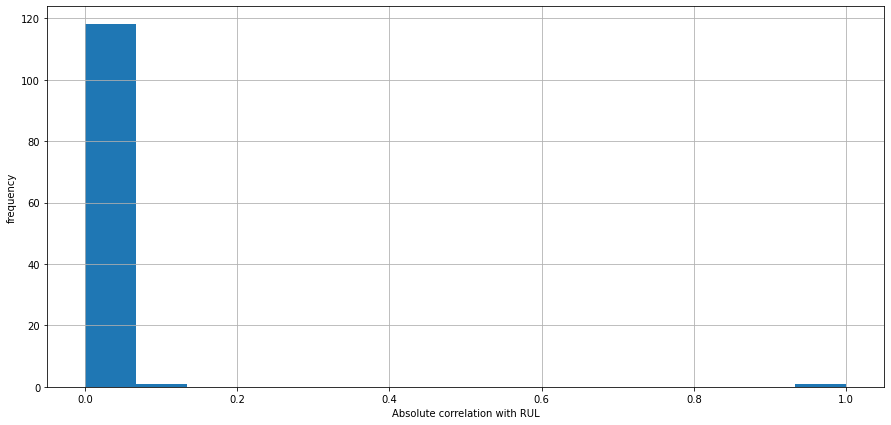

In [ ]:
cor_target = abs(cor["RUL"])
cor_target.hist(bins=15, figsize=(15,7))
plt.xlabel('Absolute correlation with RUL')
plt.ylabel('frequency')
plt.show()

From the distribution, we can see that there is the majority of features have very low correlation (<0.2) with RUL. 

To select important features, we will use **SelectKbest** with f_regression. SelectKBest will help to return k features with highest scores from f_regression. 

We will test with different values of k to see which value yields the best result in the train set. The range of k will be from 20 to 50. 



In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
score_list = [] 
#test start
for i in range(20,51): 
  fs = SelectKBest(f_regression, k = i)
  fs.fit(X_po, y)
  X_new = fs.transform(X_po)
  X_new = pd.DataFrame(X_new)
  X_test_new = fs.transform(X_val_po)
  #fit model
  model = fit_lr(X_new, y, X_val, y_val)
  #score model for train set
  r2, rmse, score, under, over, correct = evaluate_model(model, X_new, y)
  score_list.append([i, r2, rmse, score, under, over, correct])
score_list = pd.DataFrame(score_list, columns = ['k value', 'r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univari

Let's print out the top 5 with highest Score in train set, and top 5 with highest Score in test set.

In [ ]:
score_list.sort_values('Score').head(5)

k value  r2_score  ...  over-prediction  correct-prediction
14       34  0.792224  ...             9131                   0
13       33  0.787802  ...             9095                   0
12       32  0.787762  ...             9076                   0
15       35  0.798170  ...             9230                   0
11       31  0.786851  ...             9039                   0

[5 rows x 7 columns]

**k = 34** brings the best performance. Let's run SelectKBest and see the 34 most important features.

In [ ]:
fs = SelectKBest(f_regression, k = 34)
fs.fit(X_po, y)
fs.get_support()
X_new = fs.transform(X_po)
X_po = pd.DataFrame(X_new) #turn to DataFrame
X_val_po = fs.transform(X_val_po)
print('Best features:\n', np.array(X_po_columns)[fs.get_support()])

Best features:
 ['T50' 'Ps30' 'phi' 'T24 T50' 'T24 Ps30' 'T30 T50' 'T30 Ps30' 'T30 BPR'
 'T30 htBleed' 'T50^2' 'T50 Nf' 'T50 Nc' 'T50 Ps30' 'T50 NRf' 'T50 NRc'
 'T50 BPR' 'T50 htBleed' 'P30 phi' 'P30 W31' 'P30 W32' 'Nf Ps30' 'Nc Ps30'
 'Nc BPR' 'Ps30^2' 'Ps30 NRf' 'Ps30 NRc' 'Ps30 BPR' 'Ps30 htBleed' 'phi^2'
 'phi W31' 'phi W32' 'NRc BPR' 'BPR htBleed' 'W31 W32']


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


Let's re-run k-fold with these 33 important features and compare the performance with previous run (120 polynomial features)

In [ ]:
quick_fit_evaluate_lr(X_po,y,X_val_po,y_val)

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.790904  14.758808  ...           1829.0                 0.0
k-fold train  0.792362  14.709247  ...           7321.4                 0.0
validation    0.791995  14.672050  ...           1795.8                 0.0

[3 rows x 6 columns]

As expected, **not all 120 features are necessary to bring improvements to the model performance**. There are slight decrease in performance compared to previous run, but they are minimal. 
*   **R2** continues to equally the same for train set and validation set (0.79), slightly worse compared to previous performance (0.81).
*   **RMSE** for k-fold and validation set are equally the same(~14), slightly worse compared to previous performance (13)
*   **Score is slightly worse** (15797) compared to previous performance (~12515 in validation set )
*   Tendency towards over-prediction is the same. There are still no correct predictions.

We can conclude polynomial regression results in much better performance than linear regression. 

We will run polynomial regression with these 34 important features and save the results in final_score for future use. 

In [ ]:
poly = linear_model.LinearRegression()
model = poly.fit(X_po, y)
r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po,y_val)
final_score.loc['Poly (34 features)'] = [r2, rmse, score, under, over, correct]

###**6.5. Support Vector Regression** 

Another regression we could try is Support Vector Regression. Support Vector Regression (SVR) uses the same principle as Support Vector Machine (SVM), but for regression problems. 

SVR differs to Linear Regression by setting a boundary at a distance epsilon (e) from the data. Points fall within the boundaries are ignored when minimizing the loss function during model fitting. 

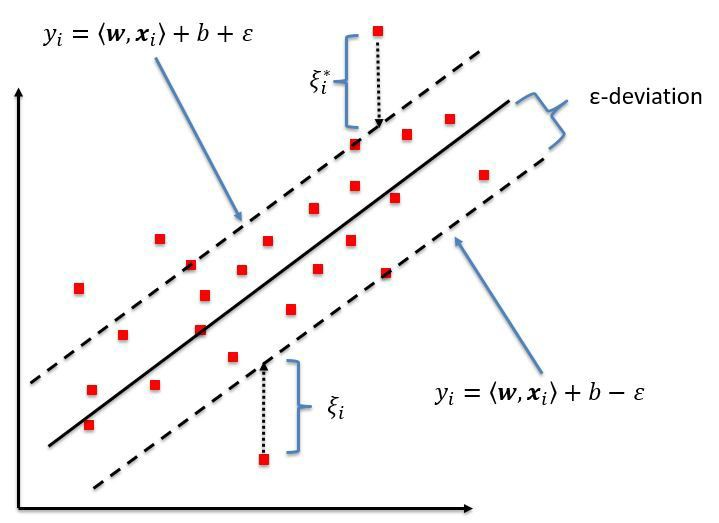

The solid back line represents the target, where the dashed lines are the boundaries at distance epsilon (e). Only points outside the boundaries contribute to model fitting and minimizing the loss function. 

To apply SVR, first we need to scale the data. 

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(X_po)
X_po_scaled = scaler.transform(X_po)
X_po_scaled = pd.DataFrame(X_po_scaled) #turn to dataframe
X_val_po_scaled = scaler.transform(X_val_po)
X_val_po_scaled = pd.DataFrame(X_val_po_scaled) #turn to dataframe

Let's have a quick look at the scaled data. 

In [ ]:
X_po_scaled.describe(include='all')

0             1   ...            32            33
count  17193.000000  17193.000000  ...  17193.000000  17193.000000
mean       0.450543      0.411560  ...      0.452893      0.557487
std        0.151986      0.159053  ...      0.156098      0.162232
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.339467      0.297619  ...      0.340735      0.457970
50%        0.434841      0.392857  ...      0.436127      0.573371
75%        0.545071      0.505952  ...      0.546740      0.675351
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 34 columns]

Now let's fit a SVR model, with k-fold (k = 5)

In [ ]:
#create a function to run svr model with k-fold
def quick_fit_evaluate_svr(X,y,X_val,y_val):
  kf = KFold(n_splits=5, shuffle= True, random_state= 2)
  score_list = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
      y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
      #create and fit model
      regr = LinearSVR()
      model = regr.fit(X,y)
      #score model for k-fold train set
      r2, rmse, score, under, over, correct = evaluate_model(model, X_train, y_train)
      score_list.append(['k-fold train', r2, rmse, score, under, over, correct])
      #score model for k-fold test set
      r2_1, rmse1, score1, under1, over1, correct1 = evaluate_model(model, X_test, y_test)
      score_list.append(['k-fold test', r2_1, rmse1, score1, under1, over1, correct1])
      #score model for the validation set
      r2_2, rmse2, score2, under2, over2, correct2 = evaluate_model(model, X_val, y_val)
      score_list.append(['validation', r2_2, rmse2, score2, under2, over2, correct2])
  #combine all lists into a dataframe for score
  kf_score = pd.DataFrame(score_list, columns = ['type','r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])
  return kf_score.groupby('type').mean()

In [ ]:
quick_fit_evaluate_svr(X_po_scaled,y,X_val_po_scaled,y_val)

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.749497  16.155340  ...           1719.2                 0.0
k-fold train  0.749525  16.155511  ...           6881.4                 0.6
validation    0.755195  15.917094  ...           1712.0                 0.0

[3 rows x 6 columns]

The SVR performance is so-so, worse than the polynomial regression in all 3 metrics.  
It is worth noted that RSME is slightly better in the validation set than in the k-fold. It is also noted that the SVR has quite the balance betwwen under and over prediction

Let's try different epsilon value to see which yeilds the best performance. 

In [ ]:
epsilon = np.arange(0.0,0.55,0.05)
score_list = []
for i in epsilon:
  #create and fit model
  regr = LinearSVR(epsilon=i, random_state= 2)
  model = regr.fit(X_po_scaled,y)
  #predict and calculate score
  r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
  score_list.append([i, r2, rmse, score, under, over, correct])
score = pd.DataFrame(score_list, columns = ['epsilon','r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])
score.sort_values('rmse')

epsilon  r2_score  ...  over-prediction  correct-prediction
1      0.05  0.755312  ...             1699                   0
6      0.30  0.755278  ...             1707                   0
2      0.10  0.755277  ...             1707                   0
9      0.45  0.755261  ...             1704                   0
7      0.35  0.755232  ...             1711                   0
5      0.25  0.755206  ...             1711                   0
8      0.40  0.755174  ...             1718                   0
3      0.15  0.755149  ...             1717                   0
4      0.20  0.755123  ...             1723                   0
0      0.00  0.755109  ...             1720                   0
10     0.50  0.755001  ...             1731                   0

[11 rows x 7 columns]

We can observe epsilon = 0.05 brings the best result, we will run SVR and save the results in final_score for future use. 

In [ ]:
svr = LinearSVR(epsilon = 0.05, random_state = 2)
model = svr.fit(X_po_scaled,y)
r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
final_score.loc['SVR'] = [r2, rmse, score, under, over, correct]

###**6.6. Ridge Regression** 

Another type of regression algorithms is Ridge Regression. While Linear Regression's loss function is Ordinary Least Squares, Ridge Regression can reduce overfitting by adding regularization parameter to the loss function (Linear least squares with l2 regularization). 

In [ ]:
from sklearn.linear_model import Ridge
#create a function to run ridge regression model with k-fold
def quick_fit_evaluate_ridge(X,y,X_val,y_val, alpha):
  kf = KFold(n_splits=5, shuffle= True, random_state= 2)
  score_list = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
      y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
      #create and fit model
      ridge = Ridge(random_state=0, alpha = alpha)
      model = regr.fit(X,y)
      #score model for k-fold train set
      r2, rmse, score, under, over, correct = evaluate_model(model, X_train, y_train)
      score_list.append(['k-fold train', r2, rmse, score, under, over, correct])
      #score model for k-fold test set
      r2_1, rmse1, score1, under1, over1, correct1 = evaluate_model(model, X_test, y_test)
      score_list.append(['k-fold test', r2_1, rmse1, score1, under1, over1, correct1])
      #score model for the validation set
      r2_2, rmse2, score2, under2, over2, correct2 = evaluate_model(model, X_val, y_val)
      score_list.append(['validation', r2_2, rmse2, score2, under2, over2, correct2])
  #combine all lists into a dataframe for score
  kf_score = pd.DataFrame(score_list, columns = ['type','r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])
  return kf_score.groupby('type').mean()

In [ ]:
quick_fit_evaluate_ridge(X_po_scaled,y,X_val_po_scaled,y_val, alpha = 1 )

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.749274  16.162541  ...           1736.6                 0.0
k-fold train  0.749302  16.162708  ...           6946.4                 0.0
validation    0.755001  15.923407  ...           1731.0                 0.0

[3 rows x 6 columns]

After running k-fold Ridge Regression, we can observe that Ridge Regression is the same to SVR in overall. 

Let's try different value for the parameter alpha to see which value yields the best result. 

In [ ]:
alpha_ridge = [1e-5, 1e-4, 1e-3,1e-2, 0.1, 1, 10]
score_list = []
for i in alpha_ridge:
  #create and fit model
  ridge = Ridge(alpha=i, random_state = 0)
  model = ridge.fit(X_po_scaled,y)
  #predict and calculate score
  r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
  score_list.append([i, r2, rmse, score, under, over, correct])
score = pd.DataFrame(score_list, columns = ['alpha','r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])
score.sort_values('rmse')

alpha  r2_score  ...  over-prediction  correct-prediction
0   0.00001  0.792053  ...             1797                   0
1   0.00010  0.789792  ...             1779                   0
2   0.00100  0.785435  ...             1747                   0
3   0.01000  0.775251  ...             1700                   0
4   0.10000  0.761390  ...             1656                   0
5   1.00000  0.757493  ...             1661                   0
6  10.00000  0.756580  ...             1649                   0

[7 rows x 7 columns]

We can obersve that alpha = 0.00001 yields the best result. We will save the model for future use. 

In [ ]:
ridge = Ridge(alpha=0.00001, random_state = 42)
model = ridge.fit(X_po_scaled,y)
r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
final_score.loc['Ridge'] = [r2, rmse, score, under, over, correct]

###**6.7. Lasso Regression** 

Another algorithm we could try is Lasso Regression. Lasso Regression is Linear Regression with L1 regularizer. 

In [ ]:
from sklearn.linear_model import Lasso
#create a function to run lasso regression model with k-fold
def quick_fit_evaluate_lasso(X,y,X_val,y_val, alpha):
  kf = KFold(n_splits=5, shuffle= True, random_state= 2)
  score_list = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
      y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
      #create and fit model
      lasso = Lasso(random_state=0, alpha = alpha)
      model = regr.fit(X,y)
      #score model for k-fold train set
      r2, rmse, score, under, over, correct = evaluate_model(model, X_train, y_train)
      score_list.append(['k-fold train', r2, rmse, score, under, over, correct])
      #score model for k-fold test set
      r2_1, rmse1, score1, under1, over1, correct1 = evaluate_model(model, X_test, y_test)
      score_list.append(['k-fold test', r2_1, rmse1, score1, under1, over1, correct1])
      #score model for the validation set
      r2_2, rmse2, score2, under2, over2, correct2 = evaluate_model(model, X_val, y_val)
      score_list.append(['validation', r2_2, rmse2, score2, under2, over2, correct2])
  #combine all lists into a dataframe for score
  kf_score = pd.DataFrame(score_list, columns = ['type','r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])
  return kf_score.groupby('type').mean()

In [ ]:
quick_fit_evaluate_lasso(X_po_scaled,y,X_val_po_scaled,y_val, alpha = 1 )

r2_score       rmse  ...  over-prediction  correct-prediction
type                               ...                                     
k-fold test   0.749274  16.162541  ...           1736.6                 0.0
k-fold train  0.749302  16.162708  ...           6946.4                 0.0
validation    0.755001  15.923407  ...           1731.0                 0.0

[3 rows x 6 columns]

After running k-fold, we can observe that Lasso Regression's performance is not so good, it is much better than the base model, but not as good as Polynomial Regression, and kind of the same to SVR and Ridge.

We could try different values for the parameter alpha. 

In [ ]:
alpha_lasso = [1e-5, 1e-4, 1e-3,1e-2, 0.1, 1, 10]
score_list = []
for i in alpha_lasso:
  #create and fit model
  lasso = Lasso(alpha=i, random_state =56, tol = 1)
  model = lasso.fit(X_po_scaled,y)
  #predict and calculate score
  r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
  score_list.append([i, r2, rmse, score, under, over, correct])
score = pd.DataFrame(score_list, columns = ['alpha','r2_score', 'rmse', 
                                                 'Score','under-prediction', 'over-prediction', 'correct-prediction'])
score.sort_values('rmse')

alpha  r2_score  ...  over-prediction  correct-prediction
0   0.00001  0.740596  ...             1648                   0
1   0.00010  0.740586  ...             1648                   0
2   0.00100  0.740486  ...             1646                   0
3   0.01000  0.739416  ...             1643                   0
4   0.10000  0.722387  ...             1608                   0
5   1.00000  0.650814  ...             1754                   0
6  10.00000 -0.000002  ...             2170                   0

[7 rows x 7 columns]

We can see that alpha = 0.00001 brings the best result, we will save the model for future use. 

In [ ]:
lasso = Lasso(alpha= 0.00001, random_state= 1, tol = 1)
model = lasso.fit(X_po_scaled,y)
r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
final_score.loc['Lasso'] = [r2, rmse, score, under, over, correct]

###**6.8. ElasticNetCV** 

ElasticNet is a different algorithm we can try. ElasticNet is Linear Regression with combined L1 and L2 priors as regularizer.

We will run ElasticNetCV (Elastic net model with best model selection by cross-validation) and save the model for future use

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic = ElasticNetCV(cv=5)
model = elastic.fit(X_po_scaled,y)
r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
final_score.loc['ElasticNet'] = [r2, rmse, score, under, over, correct]

###**6.9. Ensemble models and choose the best regression model**##

Let's check the final_score till now.

In [ ]:
final_score.sort_values('rmse')

r2_score  ...  correct-prediction
regressor                             ...                    
Poly (34 features)          0.792143  ...                 0.0
Ridge                       0.792053  ...                 0.0
LR (updated max RUL = 100)  0.757579  ...                 0.0
SVR                         0.755312  ...                 0.0
ElasticNet                  0.751412  ...                 0.0
Lasso                       0.740596  ...                 0.0
Base Linear Regression      0.581462  ...                 0.0

[7 rows x 6 columns]

From previous works, we have learnt that:
*   **Re-define RUL by setting a max value at 100** is more appropriate and via k-fold, it is **proved to bring substantial impact** to linear regression model performance. 
*   Expanding the size of our data by creating **2nd degree of Polynomial combinations could bring positive improvement**. However, not all combinations are neccessary, we have done feature selection to remove highly correlated features, and **the final features size is 34**. 
*   We have scaled the data, and try different algorithms including **SVR, Ridge Regression, Lasso Regression, and ElasticNet**.  Lasso, SVR, ElasticNet's performance are quite the same.**Ridge's performance is as good as Polynomial Regression.** 
*   **Till now, the best performed model is Polynomial Regression**, with **R2 = 0.792** (**increased by 36%** compared to base model),** RMSE = 14.6** (**reduced by 66%** compared to base model), and **Score = 15732** (**reduced by nearly 100%** compared to base model).


We will try using ensemble techiques to combine the models and see if it could bring better results than the single Polynomial Regression. 

As these models are different in their algorithms, we will use Stacking technique to ensemble them. Stacking refers to train different algorithms in parallel and combines them by training a meta-model to output a prediction. 

First we will try stacking all 05 models (poly, svr, ridge, lasso and elastic) and train a linear_regression meta-model (with 6-fold cross validation). 

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators =[('lasso', lasso), ('svr', svr), ('elasticnet', elastic), ('poly', poly), ('ridge', ridge)]
stack = StackingRegressor(estimators=estimators, final_estimator= linear_model.LinearRegression(), cv = 6)
model = stack.fit(X_po_scaled, y)
r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
final_score.loc['Stack 1 (poly-svr-elastic-ridge-lasso)'] = [r2, rmse, score, under, over, correct]
final_score.sort_values('rmse')

r2_score  ...  correct-prediction
regressor                                         ...                    
Stack 1 (poly-svr-elastic-ridge-lasso)  0.792168  ...                 0.0
Poly (34 features)                      0.792143  ...                 0.0
Ridge                                   0.792053  ...                 0.0
LR (updated max RUL = 100)              0.757579  ...                 0.0
SVR                                     0.755312  ...                 0.0
ElasticNet                              0.751412  ...                 0.0
Lasso                                   0.740596  ...                 0.0
Base Linear Regression                  0.581462  ...                 0.0

[8 rows x 6 columns]

The 1st stacked model performs slightly better than Polynomial Regression. 

We will check the performance of 2-estitmator stacked models, and see if there is any models whose Score are comparable with Polynomial Regression (**R2 >= 0.792, RMSE <= 14.666, and Score <= 15732**).

In [ ]:
def stack_2(estimator1, estimator2): #define a function to stack 2 models
  stack = StackingRegressor(estimators=[estimator1, estimator2], final_estimator= linear_model.LinearRegression(), cv = 6)
  model = stack.fit(X_po_scaled, y)
  r2, rmse, score, under, over, correct = evaluate_model(model,X_val_po_scaled,y_val)
  score_list.append([estimator1[0], estimator2[0], r2, rmse, score, under, over, correct])
  return score_list

In [ ]:
model = [('lasso', lasso), ('svr', svr), ('elasticnet', elastic), ('poly', poly), ('ridge', ridge)]
score_list = []
for j in range(0,5):
  for i in range(j+1,5):
    stack_2(model[j], model[i])

group2 = pd.DataFrame(score_list,columns = ['model 1','model 2','r2_score', 'rmse', 
                                'Score','under-prediction', 'over-prediction', 'correct-prediction'])
group2.sort_values('rmse')

model 1     model 2  ...  over-prediction  correct-prediction
2       lasso        poly  ...             1797                   0
7  elasticnet        poly  ...             1795                   0
9        poly       ridge  ...             1797                   0
5         svr        poly  ...             1795                   0
8  elasticnet       ridge  ...             1798                   0
6         svr       ridge  ...             1802                   0
3       lasso       ridge  ...             1794                   0
0       lasso         svr  ...             1620                   0
4         svr  elasticnet  ...             1609                   0
1       lasso  elasticnet  ...             1620                   0

[10 rows x 8 columns]

Stacked Polynomial Regression and other models (Lasso, Elasticnet, Ridge, SVR) brings very minimal improvement to the model.  Therefore, I would choose **Polynomial Regression to be the best regression model.** 

In conclusion, the final regression model used the assumption that max RUL equals to 125 and then linearly declines for training, ultiziled 34 most contributing 2nd order polynomial features, and used Ridge Regression. We will train the final model on the whole training set (06 folds). The results shall be discuss in the conclusion section. 

In [ ]:
#merge train set and validation set
X_reg = pd.concat([X_po_scaled, X_val_po_scaled], axis = 0)
y_reg = pd.concat([y,y_val], axis = 0)
#create and fit model
poly = linear_model.LinearRegression()
model = poly.fit(X_reg,y_reg)
r2, rmse, score, under, over, correct = evaluate_model(model,X_reg,y_reg)

##**VII. DATA PREPARATION - CLASSIFICATION APPROACH**##

Classification approach could be applied to this project. In practical business viewpoint, a classification model which could predict the condition status of equipments could yield as much values as precisely predict equipments' RUL. 

Therefore, the project will expand the scope to develop a classification model that could predict equipment's condition in **3 classes: "healthy", "degraded", and "critical"**. Knowing the condition status of the equipment could help organizations to develop appropriate maintenance strategies that not only save resources but also maximize values from its equipment. 

As we are changing the approach, we need to prepare the data. First let's review the training data (after EDA). 

In [ ]:
df.describe(include='all')

unit_number  time_in_cycles  ...           W32           RUL
count  20631.000000    20631.000000  ...  20631.000000  20631.000000
mean      51.506568      108.807862  ...     23.289705    107.807862
std       29.227633       68.880990  ...      0.108251     68.880990
min        1.000000        1.000000  ...     22.894200      0.000000
25%       26.000000       52.000000  ...     23.221800     51.000000
50%       52.000000      104.000000  ...     23.297900    103.000000
75%       77.000000      156.000000  ...     23.366800    155.000000
max      100.000000      362.000000  ...     23.618400    361.000000

[8 rows x 17 columns]

The training data includes 02 nominal features (unit_number and time_in_cycles), 14 features and the target (RUL).

Previously we have found that the linearly declining assumption about RUL is not appropriate and decided to set a max threshold = 100 for RUL. We also noted when analyzing sensors distribution that they have the tendency to fluctuate greatly towards failure, especially when RUL is less than 50 cycles. 

As we don't have the domain knowledge on this equipment, we need to check the distribution of RUL to draw assumptions on condition classification. 

In [ ]:
df['RUL'].describe(include='all')

count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

With the 1st quartile of RUL is 51 and previous observation in sensor distribution, it is safe to assume that with RUL < 51, the equipment could be consider to be in "critical" condition, that needs immediate monitor and maintenance. 

However, if we use the previous assumption that a max_threshold = 100 of RUL indicates that is when equipments show signs of degradation, i.e. an engine is healthy if it could run at least 100 cycles before failure, the number of "healthy" observations would be very large (~50% of training sample size). This could lead to imbalance in training the models. 

In previous section (6.3.3.), we have noted that while the sensor trends are stable in first 50 - 150 cycles, the RUL trend is also stable; and when the sensor trends start to bend, the RUL trend becomes linear declining. Thus, let's assume the max_threshold of RUL to 125. 

In short our assumption of "Condition" is: 
*   **"healthy"**: if an equipment is considered "healthy", it could run at least 125 cycles before failure. (RUL >= 125)
*   **"degraded"**: if an equipment is considered "degraded", it could run between 51 to 100 cycles before failure.  (125 > RUL >= 51)
*   **"critical"**: if an equipment is considered "critical", it could run at most 50 cycles before failure. (51 > RUL)

We will drop 'unit_number', 'time_in_cycles', and 'RUL' columns in train and add 'Condtion' column based on the assumption above. And check the distribution of 'Condition'.

In [ ]:
train = pd.DataFrame.copy(df) #create a copy of df
#add condition based on assumption
condition = []
for i in train['RUL']:
  if i < 51:
    condition.append('critical')
  elif i >= 125:
    condition.append('healthy')
  else:
    condition.append('degraded') 

train.drop(columns=['RUL','unit_number', 'time_in_cycles'], inplace = True) #drop RUL, 'unit_number', 'time_in_cycles' column
train['Condition'] = condition #add condition column
train['Condition'].value_counts() #re-check distribution of condition

healthy     8131
degraded    7400
critical    5100
Name: Condition, dtype: int64

Counting the values of condition, we can observations of all 03 classes are quite equal to each other, but the majority belongs to "healthy" class.

Next to prepare for modelling, we will define feature set X_org and target y_org, and also normalize X as the 14 features each has a different range of values.

In [ ]:
X_org = train.drop(columns = ['Condition']) #define feature set X 
y_org = train['Condition'] #define target y 
X_org = preprocessing.StandardScaler().fit(X_org).transform(X_org.astype(float)) #standardize X
X_org = pd.DataFrame(X_org)

Now we will continue to split the train data into 06 folds, with 01 fold for validation (independent test), and 05 folds for training. Then we need to check the split to ensure no distribution deviation

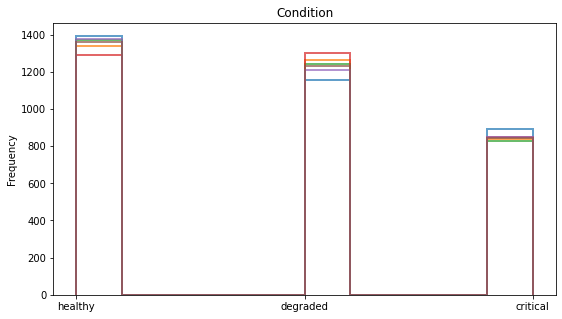

In [ ]:
kf = KFold(n_splits=6, shuffle= True, random_state=12) #create 6 folds, shuffle the data before splitting
#visualize the distribution of RUL in each fold by histogram
fig, ax = plt.subplots(figsize=(9,5))
for train_index, test_index in kf.split(X_org):
    X, X_val = X_org.iloc[list(train_index)], X_org.iloc[list(test_index)] 
    y, y_val = y_org.iloc[list(train_index)], y_org.iloc[list(test_index)]
    ax.hist(y_val, bins=10, histtype='step', linewidth=2,alpha=0.7, label=['Condition'])
plt.ylabel('Frequency')
plt.title('Condition')
plt.show()

The split is good. We will continue to define measurements.

##**VIII. MODELLING AND EVALUATION - CLASSIFICATION APPROACH**##

###**8.1. Evaluation measurements**##

In order to evaluate classification models, I will use **confusion matrix**, and **F1-score**. Model performance will be evaluated primarily on F1-score on the validation set. 




*   **Confusion matrix can tell whether the model is confusing two classes**.  The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions. Below is an example of confusion matrix.

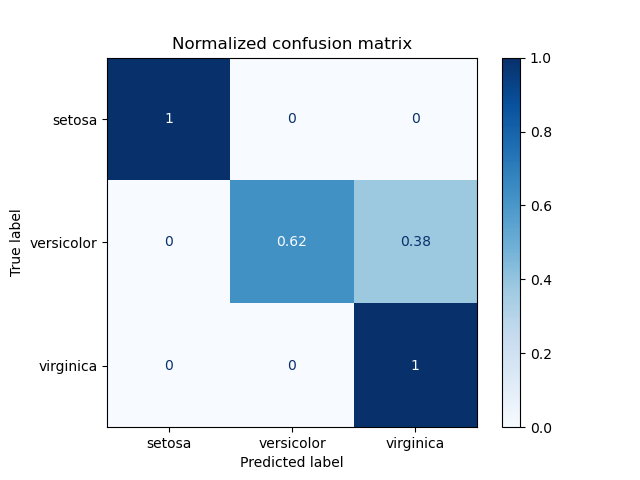

*   **F1-score** is the harmonic mean of precision and recall. In the multi-class case, this is the average of the F1 score of each class with weighting depending on the *average* parameter. Here we will set the average parameter = 'micro' (Calculate metrics globally by counting the total true positives, false negatives and false positives). The higher F1, the better the model performs. 

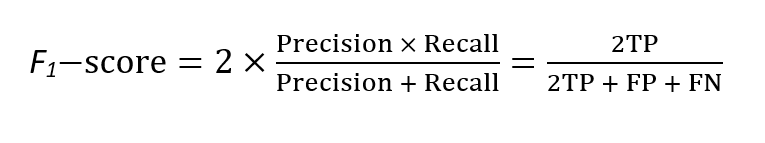



In [ ]:
from sklearn.metrics import f1_score, plot_confusion_matrix

#develop a function to automatically calculate evaluation metrics
def evaluate_model2(model, X, y):
    y_hat = model.predict(X)
    f1 = f1_score(y, y_hat, average='micro')  
    return f1

def plot_confusion(model, X, y, X_val, y_val):
  #plot confusion matrix for train set
  plt.figure()
  plot_confusion_matrix(model, X, y, normalize='true', cmap=plt.cm.Blues)
  plt.title('Normalized Confusion matrix - Train')
  #plot confusion matrix for validation set
  plt.figure()
  plot_confusion_matrix(model, X_val, y_val, normalize='true', cmap=plt.cm.Blues)
  plt.title('Normalized Confusion matrix - Validation')

#create a list to store different model performance scores for future use
cl_score_list = [] 

###**8.2. K Nearest Neighbor**##

First we will fit a base K Nearest Neighbor(KNN) model. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def fit_evaluate(model): #define a function to quickly fit and evaluate the model on both train set and test set. 
  model.fit(X, y)
  f1_train = evaluate_model2(model, X, y)
  f1_test = evaluate_model2(model, X_val, y_val)
  return f1_train, f1_test

F1-score (train)  F1-score (validation)
classifier                                         
KNN (base)          0.794684               0.680047

<Figure size 432x288 with 0 Axes>

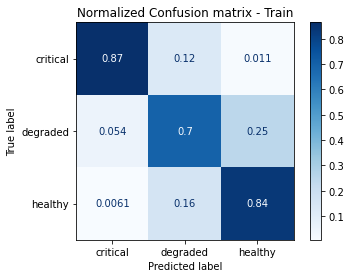

<Figure size 432x288 with 0 Axes>

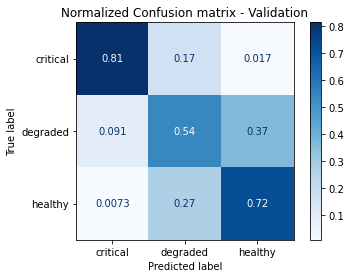

In [ ]:
#set knn base case
knn = KNeighborsClassifier()  
f1_train, f1_test = fit_evaluate(knn) 
#save result to final_score2
cl_score_list.append(['KNN (base)',f1_train, f1_test]) 
final_score2 = pd.DataFrame(cl_score_list, columns = ['classifier', 'F1-score (train)','F1-score (validation)'])
final_score2 = final_score2.set_index('classifier')
#plot confusion matrix
plot_confusion(knn, X, y, X_val, y_val)
#print final_score2
final_score2

We can observe that the base KNN model performs quite well. 
*   The base F1-score (0.79) is quite good in train set, but it is not quite good in validation set (~0.68). 
*   Looking at the confusion matrix, **the model works very well in predicting "critical" and "healthy" classes**.
*   For "healthy", the model works very well (84%) in train set, but not as good in validation set (72%). **For 'degraded', the performance is quite ok in the train set, but just a little better than random guessing in the validation set, we can see that the model clearly confuses it with 'healthy'**. This might be due to the assumption that the explicit boundary between healthy and the start of degradation is when RUL = 125. In practice, it is very difficult to identify such boundaries, and to resolve this, it requires time-series analysis on sensors, which is out of the scope of this project. 


Next we will try to tune n_neighbors hyperparameter for the KNN model to get better performance. We will use GridSearchCV to find the best n_neighbors.


In [ ]:
n_neighbors = list(range(10,300,50)) # default=5
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)
#Create new KNN object
knn_tune = KNeighborsClassifier()
#Use GridSearch
grid = GridSearchCV(knn_tune, hyperparameters, cv=6)
#Fit the model on training set
knn_tune = grid.fit(X,y)
#Print The value of best Hyperparameter
print('Best n_neighbors:', knn_tune.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 110


The best n_neighbors for KNN is 110. Let's train another knn model with this updated hyperparameter.

F1-score (train)  F1-score (validation)
classifier                                          
KNN (base)           0.794684               0.680047
KNN (tuned)          0.737277               0.728912

<Figure size 432x288 with 0 Axes>

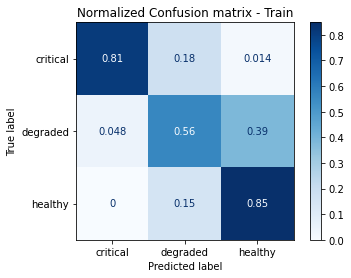

<Figure size 432x288 with 0 Axes>

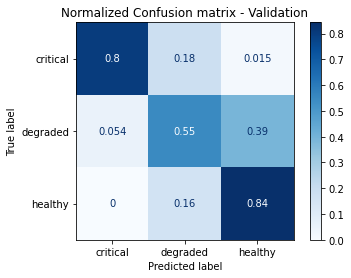

In [ ]:
knn_tune = KNeighborsClassifier(n_neighbors=110)
f1_train, f1_test = fit_evaluate(knn_tune)
final_score2.loc['KNN (tuned)'] = [f1_train, f1_test]
#plot confusion matrix
plot_confusion(knn_tune, X, y, X_val, y_val)
#print final_score2
final_score2                                                   

The tuned KNN model performs better in the validation set, with the f1-score increase to 0.728. However, in the train set, it performs worse, the metric reduced to 0.73. The tuned model performance on predicting 'degraded' class has been the same for validadtion set, but worse for train set.

###**8.3. Decision Tree**##

We will fit a Decision Tree classification model.

F1-score (train)  F1-score (validation)
classifier                                                   
KNN (base)                    0.794684               0.680047
KNN (tuned)                   0.737277               0.728912
Decision Tree (base)          1.000000               0.657941

<Figure size 432x288 with 0 Axes>

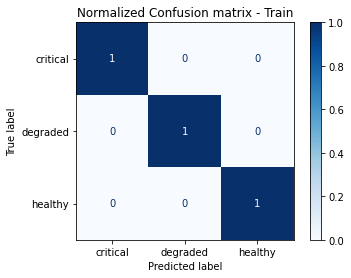

<Figure size 432x288 with 0 Axes>

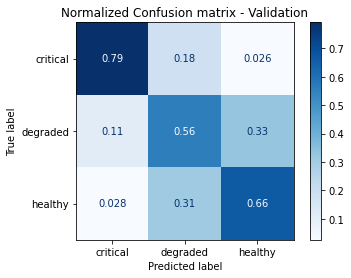

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
f1_train, f1_test = fit_evaluate(tree) 
#save result to final_score2
final_score2.loc['Decision Tree (base)'] = [f1_train, f1_test]
#plot confusion matrix
plot_confusion(tree, X, y, X_val, y_val)
#print final_score2
final_score2

It is clearly that the model has overfitted the train set. Let's check for the tree depth. 

In [ ]:
print('depth:', tree.get_depth())

depth: 32


We will limit the depth of the tree, and also find the best values for max_features. 

In [ ]:
#List Hyperparameters for tuning
max_depth = list(range(5,20)) #default=None
max_features = list(range(1,5))
#Convert to dictionary
hyperparameters = dict(max_depth = max_depth, max_features = max_features)
#Create new DecisionTree object
tree2 = DecisionTreeClassifier(random_state=42)
#Use GridSearch
clf = GridSearchCV(tree2, hyperparameters, cv=6)
#Fit the model on training set
tree2 = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best max_depth:', tree2.best_estimator_.get_params()['max_depth'])
print('Best max_features:', tree2.best_estimator_.get_params()['max_features'])

Best max_depth: 8
Best max_features: 3


The best max_depth is 8 and the best max_features is 3. We will fit a new DT model and check its result.

F1-score (train)  F1-score (validation)
classifier                                                    
KNN (base)                     0.794684               0.680047
KNN (tuned)                    0.737277               0.728912
Decision Tree (base)           1.000000               0.657941
Decision Tree (tuned)          0.738382               0.688482

<Figure size 432x288 with 0 Axes>

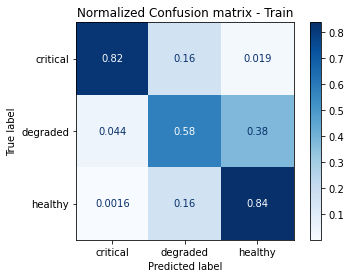

<Figure size 432x288 with 0 Axes>

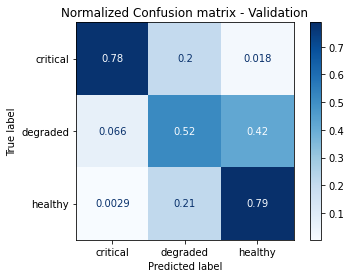

In [ ]:
tree_tune = DecisionTreeClassifier(max_depth= 8, max_features = 3, random_state = 42)
f1_train, f1_test = fit_evaluate(tree_tune) 
#save result to final_score2
final_score2.loc['Decision Tree (tuned)'] = [f1_train, f1_test]
#plot confusion matrix
plot_confusion(tree_tune, X, y, X_val, y_val)
#print final_score2
final_score2

The tuned DT model works well in overall, no longer overfitted to the train set, but the confusion between 'degraded' and 'healthy' has not been reduced. 

We will remove the base DT out of final_score.

In [ ]:
final_score2.drop(index='Decision Tree (base)', inplace= True)

###**8.4. Support Vector Machine**##

Next we will fit a SVM classification model. 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


F1-score (train)  F1-score (validation)
classifier                                                    
KNN (base)                     0.794684               0.680047
KNN (tuned)                    0.737277               0.728912
Decision Tree (tuned)          0.738382               0.688482
SVM                            0.708951               0.706515

<Figure size 432x288 with 0 Axes>

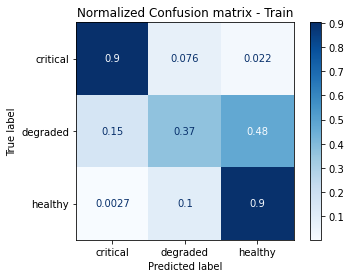

<Figure size 432x288 with 0 Axes>

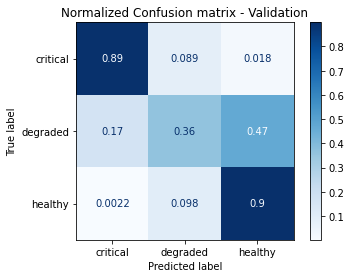

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(random_state= 42)
f1_train, f1_test= fit_evaluate(svm) 
#save result to final_score2
final_score2.loc['SVM'] = [f1_train, f1_test]
#plot confusion matrix
plot_confusion(svm, X, y, X_val, y_val)
#print final_score2
final_score2

The SVM model does not work well, kind of similar to the base KNN model. It totally confuses between  'healthy' and 'degraded' classes, in both train and validation set. 

We will try to fine tune the hyperparameter C to see if it could improve the performance. 

In [ ]:
Cs = [0.001, 0.01, 0.1, 1, 10] #default=1.0
#Convert to dictionary 
hyperparameters = dict(C = Cs)
#Create new SVM object
svm = LinearSVC(tol = 1)
#Use GridSearch
clf = GridSearchCV(svm, hyperparameters, cv=6)
#Fit the model on training set
svm = clf.fit(X, y)
#Print The value of best Hyperparameters
print('Best C:', svm.best_estimator_.get_params()['C'])

Best C: 10


The best value for C is 1, which is the same to SVM base model. We will drop this model from final_score.

In [ ]:
final_score2.drop(index= ['SVM'], inplace= True)

###**8.5. Logistic Regression**##

Next we will fit the Logistics Regression model. 

F1-score (train)  F1-score (validation)
classifier                                                    
KNN (base)                     0.794684               0.680047
KNN (tuned)                    0.737277               0.728912
Decision Tree (tuned)          0.738382               0.688482
Logistic Regression            0.724655               0.712624

<Figure size 432x288 with 0 Axes>

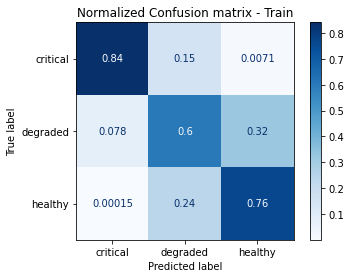

<Figure size 432x288 with 0 Axes>

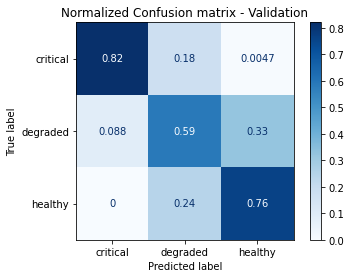

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
f1_train, f1_test= fit_evaluate(log) 
#save result to final_score2
final_score2.loc['Logistic Regression'] = [f1_train, f1_test]
#plot confusion matrix
plot_confusion(log, X, y, X_val, y_val)
#print final_score2
final_score2

The Logisitcs Regression model performs quite good, the performance is similar to tuned Decision Tree. However, the confusion between 'degraded' and 'healthy' also happens in both train and validation sets. 

###**8.6. Ensemble models and choose the best classification model**

Let's check the final_score2 till now.

In [ ]:
final_score2

F1-score (train)  F1-score (validation)
classifier                                                    
KNN (base)                     0.794684               0.680047
KNN (tuned)                    0.737277               0.728912
Decision Tree (tuned)          0.738382               0.688482
Logistic Regression            0.724655               0.712624

From previous works, we learn that: 


*   **The best performed model till now is the KNN (tuned)** with highest f1-score (0.728) in the validation set**. 
*   The base KNN model works best in the train set, but worst in the validation set. 
*   It is worth noted that the Logistics Regression has good performance, just slightly worse than the tuned KNN.

Next we will try soft voting and hard voting, and check if they could yield better result than the KNN (tuned).


 

 



F1-score (train)  F1-score (validation)
classifier                                                    
KNN (base)                     0.794684               0.680047
KNN (tuned)                    0.737277               0.728912
Decision Tree (tuned)          0.738382               0.688482
Logistic Regression            0.724655               0.712624
Soft Voting                    0.748793               0.725422

<Figure size 432x288 with 0 Axes>

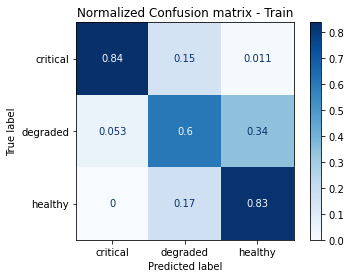

<Figure size 432x288 with 0 Axes>

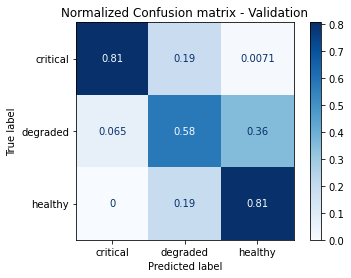

In [ ]:
from sklearn.ensemble import VotingClassifier
#TO DO:
#create a dictionary of our models
models = [('KNN_tune',knn_tune),('DT_tune', tree_tune), ('Log',log)]
#create our voting classifier, inputting our models
eclf1 = VotingClassifier(estimators= models, voting = 'soft')
f1_train, f1_test = fit_evaluate(eclf1) 
#save result to final_score2
final_score2.loc['Soft Voting'] = [f1_train, f1_test]
#plot confusion matrix
plot_confusion(eclf1, X, y, X_val, y_val)
#print final_score2
final_score2

With Soft Voting, the model performs well in train set, but not as good in the test set. F1-score in validation set is 0.725, which is slighly lower KNN tuned.The ensembled model still has confusion about the 'degraded' and 'healthy' class, and rate of misclassification is quite high (~36% 'degraded' misclassified to 'healthy').

F1-score (train)  F1-score (validation)
classifier                                                    
KNN (base)                     0.794684               0.680047
KNN (tuned)                    0.737277               0.728912
Decision Tree (tuned)          0.738382               0.688482
Logistic Regression            0.724655               0.712624
Soft Voting                    0.748793               0.725422
Hard Voting                    0.743617               0.726585

<Figure size 432x288 with 0 Axes>

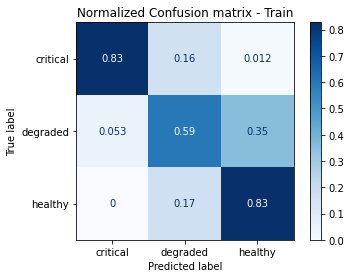

<Figure size 432x288 with 0 Axes>

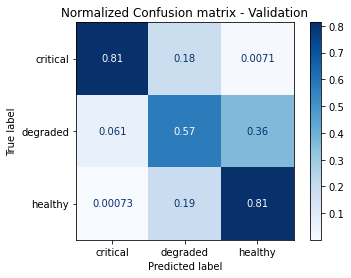

In [ ]:
eclf2 = VotingClassifier(estimators= models, voting = 'hard')
f1_train, f1_test= fit_evaluate(eclf2) 
#save result to final_score2
final_score2.loc['Hard Voting'] = [f1_train, f1_test]
#plot confusion matrix
plot_confusion(eclf2, X, y, X_val, y_val)
#print final_score2
final_score2

Hard Voting's performance is very similar to tuned Soft Voting, there are very minimal differences in their confusion matrix. 

Therefore, **our best classification model is the KNN tuned model.** We will train the final model on the whole training set (06 folds). The results shall be discuss in the conclusion section. 


In [ ]:
#create and fit model
knn_tune = KNeighborsClassifier(n_neighbors=110)
knn_tune.fit(X_org, y_org)
f1_train = evaluate_model2(knn_tune, X_org, y_org)

In [ ]:
X_org.columns

RangeIndex(start=0, stop=14, step=1)

##**IX. CONCLUSIONS**

###**9.1. Performance of final models**

We have concluded that the best regression model shall use the assumption that max RUL equals to 125 and then linearly declines for training, ultizile 34 most contributing 2nd order polynomial features, and use Ridge Regression; and the best classification model is the Logistics Regression model.

We had train the final regression and classification models. Their performance are as below:

In [ ]:
print('Final Regression Model performance:', '\n'
      'R2:',r2, 'RMSE:',rmse, 'Score:',score, '\n'
      'Under-prediction:',under, 'Over-prediction:',over, 'Correct prediction:',correct)

Final Regression Model performance: 
R2: 0.7923250610199324 RMSE: 14.702318524249518 Score: 86427.2675796826 
Under-prediction: 9671 Over-prediction: 10960 Correct prediction: 0


The final Regression model:
*   **reached a R2 of 0.792**, which means that **79.2% changes in RU can be explained by the independent variables**.
*   reached a **RMSE of 14.7**, which means that **the prediction are off on average 14.7 cycles**.
*   has the **cummulative Score of 86247.3**. Given the sample size of 20631, **an average score for each prediction is 4.18**. This is a small score that proves the prediction is very close to the true value.
*   **has a slight tendency to make over-prediction rather than under-prediction**, which is of our preference. 53% of prediction is over-prediction.


Final Classification Model performance: 
F1-score: 0.736803838883234


Text(0.5, 1.0, 'Normalized Confusion matrix - Train')

<Figure size 432x288 with 0 Axes>

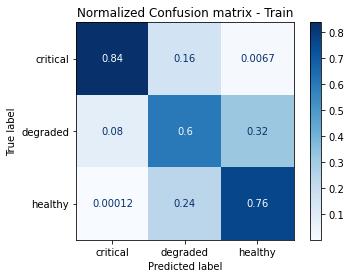

In [ ]:
print('Final Classification Model performance:', '\n'
      'F1-score:',f1_train)
plt.figure()
plot_confusion_matrix(log, X_org, y_org, normalize='true', cmap=plt.cm.Blues)
plt.title('Normalized Confusion matrix - Train')

The final Classification model:
*   **reached a F1-score of 0.736**
*   **does good when predicting "critical" and "healthy" statuses, with the correction rates of 84% and 76%**
*   makes **60% correct prediction about "degraded" status**, misclassified rate with "healthy" is 32%



For implementation, we need to save the model and develop an API to upload new sensor information and return the prediction results (both exact RUL and engine's status). The input for API is a input file that contains engine's sensors and the output is csv file that indicates which the RUL and engine's status.

In [ ]:
from sklearn.externals import joblib
# Save the polynomial regression model
regression_filename = 'regression.pkl'
print("Saving regression model to {}...".format(regression_filename))
joblib.dump(poly, regression_filename)

# Save the classification regression model
classification_filename = 'classification.pkl'
print("Saving classification model to {}...".format(classification_filename))
joblib.dump(knn_tune, classification_filename)

Saving regression model to regression.pkl...
Saving classification model to classification.pkl...


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['classification.pkl']

###**9.2. Future directions/experiments**

In future directions/experiments, the project could update final models with new data and:
*   Experiment with non-linear trends for RUL, as in practice, degradation grows gradually. 
*   Experiement classification models where the number of equipment status classes is more than 03. This could help to overcome the confusion between 'degraded' and 'healthy'. Equipment condition can be splitted to smaller categories depending on their criticality, such as critical (failure chances very high), urgent (failure chances high), degraded( failure chances medium), early degraded (degradation just starts, failure chances low), and healthy.



##**X. REFERENCES**

A. Saxena, K. Goebel, D. Simon, and N. Eklund, Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation, in the Proceedings of the 1st International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008. https://ti.arc.nasa.gov/publications/154/download/ 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial#sklearn.preprocessing.PolynomialFeatures


https://scikit-learn.org/stable/modules/classes.html?highlight=feature_selection#module-sklearn.feature_selection


https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble